# 1. Projekat:

In [1]:
import os

# Set the OMP_NUM_THREADS environment variable
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import wget
#wget.download('https://raw.githubusercontent.com/BorisMuzellec/MissingDataOT/master/utils.py')
from utils import *
import torch
import seaborn as sns 
from functools import reduce


dataframe = pd.read_excel("C:/Users/38164/Master studije/Prikupljanje i predobrada podataka za masinsko ucenje/Concrete_Data.xls")
dataframe.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


**Informacije o skupu podataka:**

Skup podataka betonske kompresivne snage sastoji se od 1030 uzoraka betonskih kompozicija. Svaki uzorak karakterišu različite ulazne karakteristike, uključujući količinu cementa, šljaku od udarne peći, pepeo za muve, vodu, superplasticizer, grubi agregat, fini agregat i starost betona. Ove osobine opisuju suštinske aspekte sastava betona koji utiču na njegovu snagu. Ciljna promenljiva u skupu podataka je kompresivna snaga uzoraka betona, merena u megapaskalima (MPa).

In [110]:
dataframe.shape

(1030, 9)

### 1.1 Istraživačka analiza podataka:

Naredni korak je sveobuhvatna istraživačka analizu podataka zarad sticanja uvida u skup podataka. To uključuje ispitivanje raspodele i sumarne statistike svakog feature-a, identifikovanje nedostajućih vrednosti i duplikata i istraživanje korelacija među feature-ima.

**Sumarna statistika:**

In [111]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


**Raspodela:**

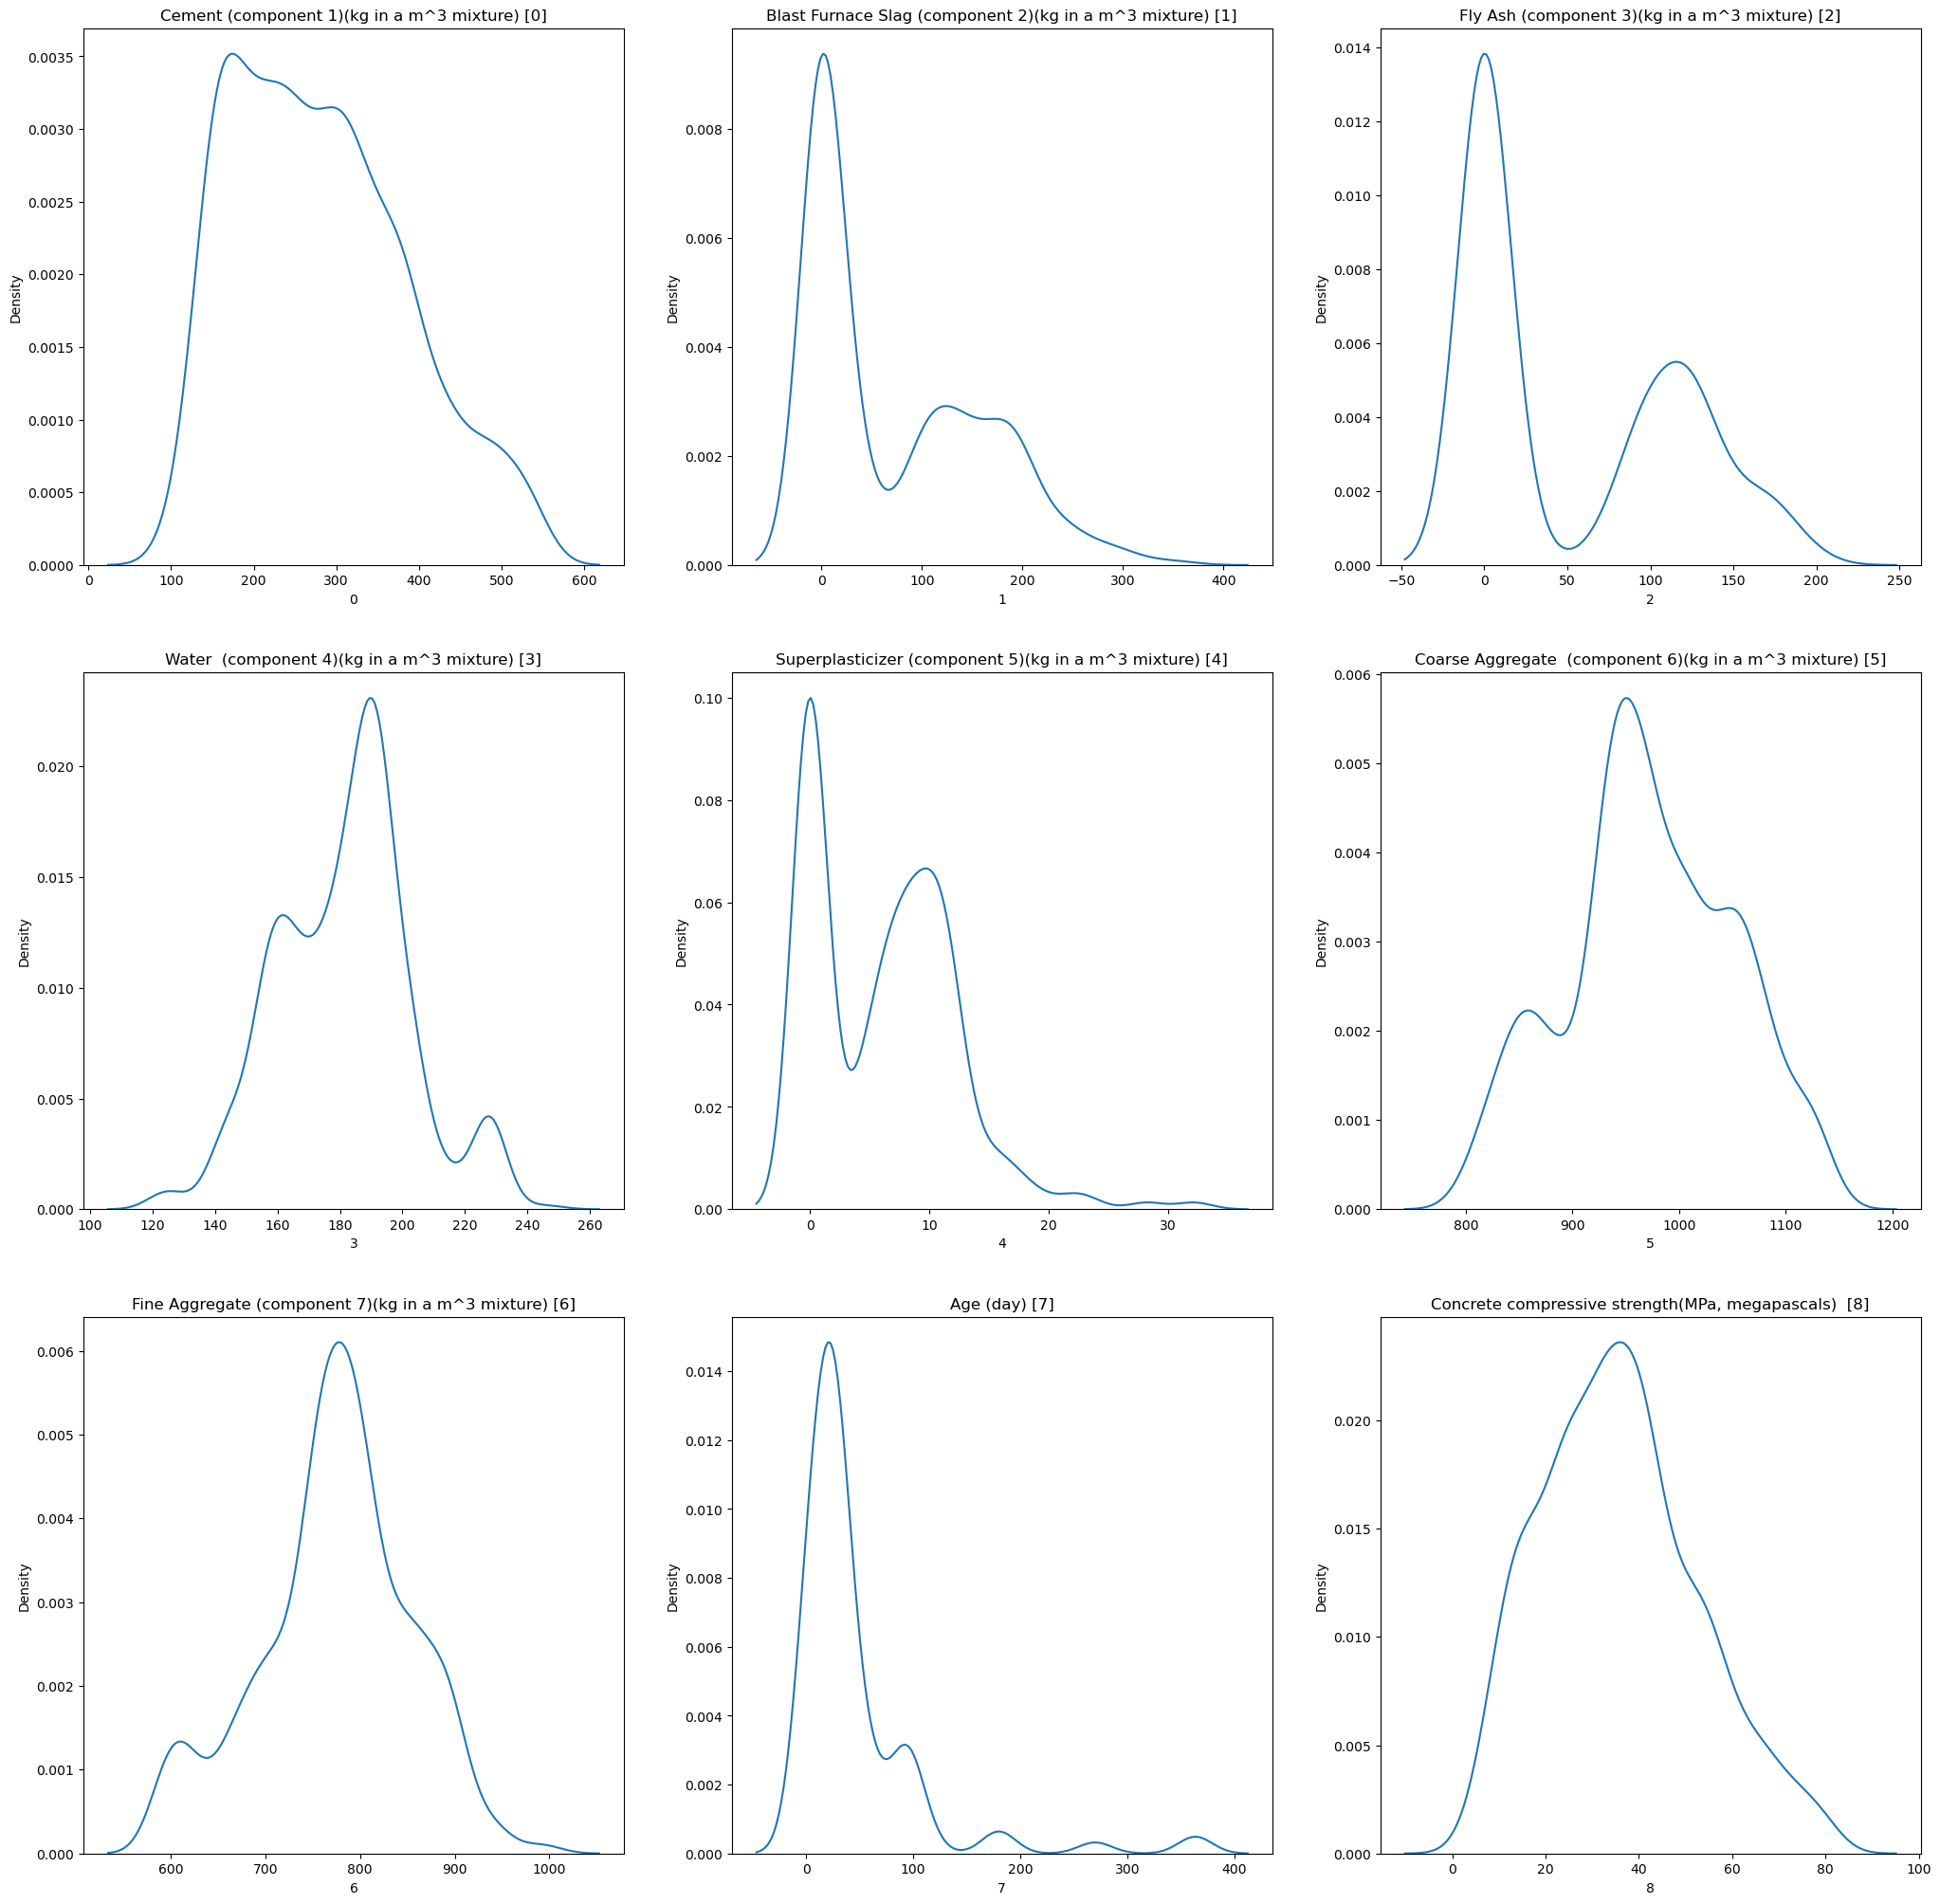

In [112]:
df_distribution = dataframe.copy()
potential_features_to_show = df_distribution.to_numpy()
mod_df = pd.DataFrame(potential_features_to_show)
fig, axs = plt.subplots(3,3, figsize=(25,25))
for i in range(3):
    for j in range(3):
        sns.kdeplot(mod_df[3*i+j], ax=axs[i][j])
        axs[i][j].set_title('{} [{}]'.format(dataframe.columns[3*i+j],3*i+j))
plt.show()

Feature-i uglavnom imaju normalnu raspodelu ili raspodelu nalik njoj, što je za potrebe mnogih imputacionih metoda sasvim dovoljno. Nema značajnijih outlier-a.

**Korelacija medju atributima:**

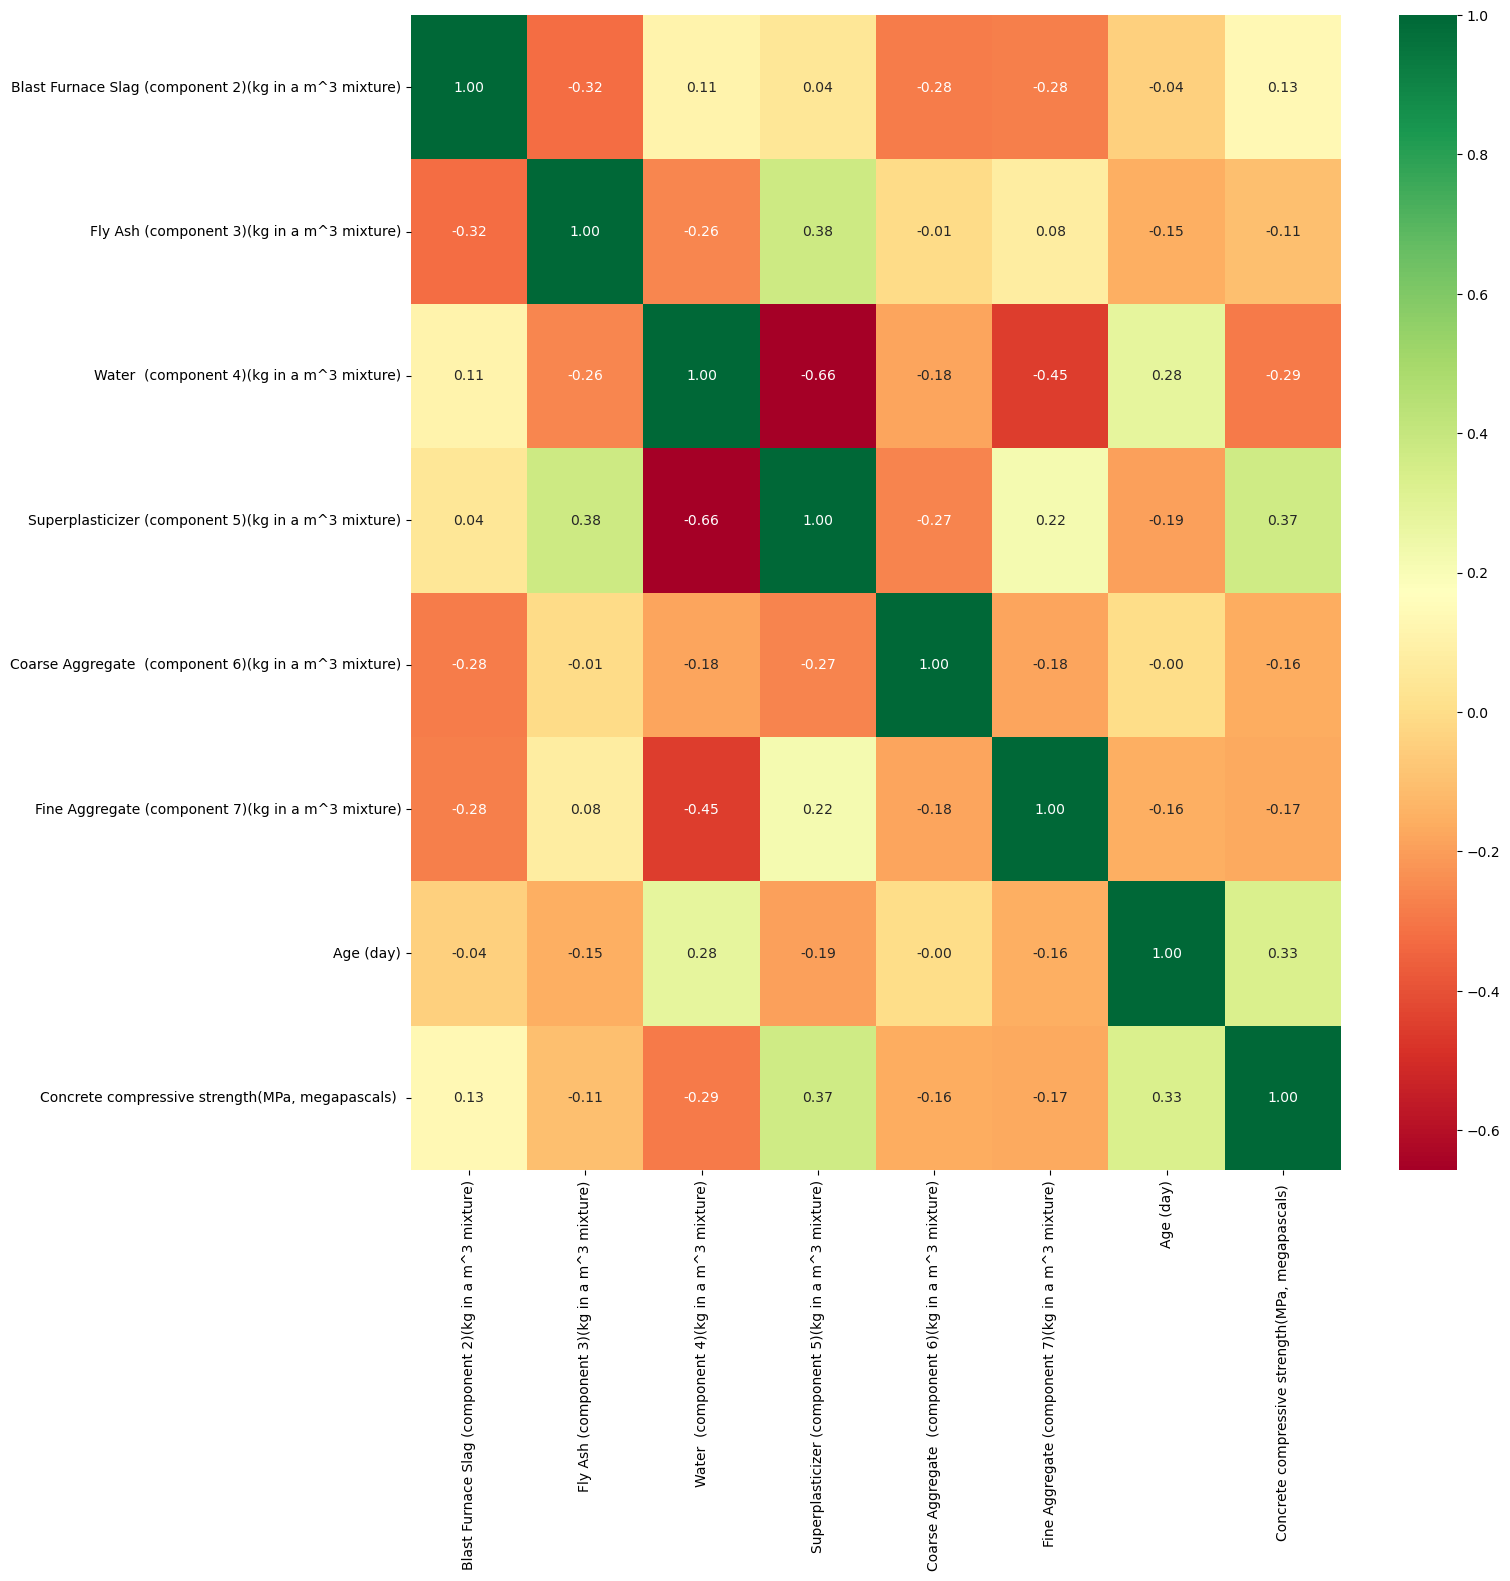

In [113]:
plt.figure(figsize=(15,15))
sns.heatmap(dataframe[dataframe.columns[1:]].corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

Nema jakih korelacija među atributima.

### 1.3 Uvođenje nedostajućih vrednosti

U ovom koraku sledi definicija funkcije za sintetičko uvođenje nedostajućih vrednosti. Na taj način se mogu adekvatno demonstrirati efekti različitih metoda za imputaciju nedostajućih vrednosti.

**Uvodjenje nedostajucih vrednosti:**

In [3]:

# Fix the seed ------------------------------------------------------
np.random.seed(0)

# Function produce_NA for generating missing values ------------------------------------------------------

def produce_NA(X, p_miss, mecha="MCAR", opt=None, p_obs=None, q=None):
    """
    Generate missing values for specifics missing-data mechanism and proportion of missing values. 
    
    Parameters
    ----------
    X : torch.DoubleTensor or np.ndarray, shape (n, d)
        Data for which missing values will be simulated.
        If a numpy array is provided, it will be converted to a pytorch tensor.
    p_miss : float
        Proportion of missing values to generate for variables which will have missing values.
    mecha : str, 
            Indicates the missing-data mechanism to be used. "MCAR" by default, "MAR", "MNAR" or "MNARsmask"
    opt: str, 
         For mecha = "MNAR", it indicates how the missing-data mechanism is generated: using a logistic regression ("logistic"), quantile censorship ("quantile") or logistic regression for generating a self-masked MNAR mechanism ("selfmasked").
    p_obs : float
            If mecha = "MAR", or mecha = "MNAR" with opt = "logistic" or "quanti", proportion of variables with *no* missing values that will be used for the logistic masking model.
    q : float
        If mecha = "MNAR" and opt = "quanti", quantile level at which the cuts should occur.
    
    Returns
    ----------
    A dictionnary containing:
    'X_init': the initial data matrix.
    'X_incomp': the data with the generated missing values.
    'mask': a matrix indexing the generated missing values.s
    """
    
    to_torch = torch.is_tensor(X) ## output a pytorch tensor, or a numpy array
    if not to_torch:
        X = X.astype(np.float32)
        X = torch.from_numpy(X)
    
    if mecha == "MAR":
        mask = MAR_mask(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "logistic":
        mask = MNAR_mask_logistic(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "quantile":
        mask = MNAR_mask_quantiles(X, p_miss, q, 1-p_obs).double()
    elif mecha == "MNAR" and opt == "selfmasked":
        mask = MNAR_self_mask_logistic(X, p_miss).double()
    else:
        mask = (torch.rand(X.shape) < p_miss).double()
    
    X_nas = X.clone()
    X_nas[mask.bool()] = np.nan
    
    return {'X_init': X.double(), 'X_incomp': X_nas.double(), 'mask': mask}

features=dataframe[dataframe.columns[:-1]].to_numpy()
target=dataframe[dataframe.columns[-1]].to_numpy()

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

ss=StandardScaler()
mms=MinMaxScaler()
ols = LinearRegression()

pct_of_mv=np.array([0.05,0.1, 0.15, 0.2, 0.25, 0.3])
scores = {}  

## 2. Metode imputacije:

U ovom odeljku se nalaze definicije funkcija za imputaciju nedostajućih vrednosti. Zbog prirode većine od ovih imputacionih metoda, odlučeno je da feature-i budu standardizovani.

### 2.1 Zero imputacion:

In [14]:
def zero_imputation(features):
    return np.nan_to_num(features.copy())

### 2.2 Mean imputation:

In [15]:
def mean_imputation(features):
    mean_imputed=features.copy()
    mask=np.isnan(mean_imputed)
    column_means = np.nanmean(mean_imputed, axis=0)
    mean_imputed[mask] = np.take(column_means, np.where(mask)[1])
    return mean_imputed

### 2.3 Expectation maximization imputation:

In [16]:
def impute_em(X, max_iter = 3000, eps = 1e-08):    
    nr, nc = X.shape
    C = np.isnan(X) == False
    
    X_tilde = X.copy()
    
    one_to_nc = np.arange(1, nc + 1, step = 1)
    M = one_to_nc * (C == False) - 1
    O = one_to_nc * C - 1
    
    # Inicijalno Mu i Sigma
    Mu = np.nanmean(X, axis = 0)
    observed_rows = np.where(np.isnan(sum(X.T)) == False)[0]
    S = np.cov(X[observed_rows, ].T)
    if np.isnan(S).any():
        S = np.diag(np.nanvar(X, axis = 0))
    
    Mu_tilde, S_tilde = {}, {}
    
    nr, nc = X.shape
    observed_rows = np.where(np.isnan(sum(X_tilde.T)) == False)[0]
    X_obs=X_tilde[observed_rows,:]
    mean = np.mean(X_obs,axis=0)
    cov = np.cov(X_obs,rowvar=False)
    num_samples = X_tilde.shape[0] 
    multivariate_data = np.random.multivariate_normal(mean, cov, size=num_samples)
    X_tilde[np.where(C==False)[0],np.where(C==False)[1]]=multivariate_data[np.where(C==False)[0],np.where(C==False)[1]]
    no_conv = True
    iteration = 0
    e=np.random.normal(0,1)
    while no_conv and iteration < max_iter:
        for i in range(nr):
            S_tilde[i] = np.zeros(nc ** 2).reshape(nc, nc)
            if set(O[i, ]) != set(one_to_nc - 1):
                M_i, O_i = M[i, ][M[i, ] != -1], O[i, ][O[i, ] != -1]
                S_MM = S[np.ix_(M_i, M_i)]
                S_MO = S[np.ix_(M_i, O_i)]
                S_OM = S_MO.T
                S_OO = S[np.ix_(O_i, O_i)]
                Mu_tilde[i] = Mu[np.ix_(M_i)] +\
                    S_MO @ np.linalg.inv(S_OO) @\
                    (X_tilde[i, O_i] - Mu[np.ix_(O_i)])
                X_tilde[i, M_i] = Mu_tilde[i]
                S_MM_O = S_MM - S_MO @ np.linalg.inv(S_OO) @ S_OM
                S_tilde[i][np.ix_(M_i, M_i)] = S_MM_O
        Mu_new = np.mean(X_tilde, axis = 0)
        S_new = np.cov(X_tilde.T, bias = 1) +\
            reduce(np.add, S_tilde.values()) / nr
        no_conv =\
            np.linalg.norm(Mu - Mu_new) >= eps or\
            np.linalg.norm(S - S_new, ord = 2) >= eps
        Mu = Mu_new
        S = S_new
        iteration += 1
        #if no_conv==False:
            #print(iteration)
            #print("Konvergiralo je")
    result = {
        'mu': Mu,
        'Sigma': S,
        'X_imputed': X_tilde,
        'C': C,
        'iteration': iteration
    }
    
    return result

### 2.4 Multiple imputation:

In [17]:
def impute_mi(features, num_of_ds=5, num_of_iterations=30):
    np.random.seed(1)
    X=features.copy()
    initial_X=impute_em(X)
    Mu=initial_X['mu']
    S=initial_X['Sigma']
    from sklearn.linear_model import LinearRegression
    import statsmodels.api as sm
    nr, nc = X.shape
    C = np.isnan(X) == False
    
    # Collect M_i and O_i's
    one_to_nc = np.arange(1, nc + 1, step = 1)
    M = one_to_nc * (C == False) - 1
    O = one_to_nc * C - 1
    
    missing_columns=np.where(np.isnan(np.sum(X.T,axis=1)) == True)
    observed_columns=np.where(np.isnan(np.sum(X.T,axis=1)) == False)
    
    completed_datasets=[]
    all_estimated_coefs={key: None for key in np.arange(0,num_of_ds)}
    all_within_variances={key: None for key in np.arange(0,num_of_ds)}

    for i in range(0,num_of_ds):
        np.random.seed((i+1)*10)
        estiamted_coefs={key: None for key in missing_columns[0]}
        within_variances={key: None for key in missing_columns[0]}
        current_Mu=Mu.copy()
        current_S=S.copy()
        iterations=0
        X_copy=X.copy()
        generated_data=np.random.multivariate_normal(current_Mu, current_S, size=nr)
        X_copy[np.where(C==False)[0],np.where(C==False)[1]]=generated_data[np.where(C==False)[0],np.where(C==False)[1]]
        while(iterations<num_of_iterations):
            generated_data=np.random.multivariate_normal(current_Mu, current_S, size=nr)
            X_copy[np.where(C==False)[0],np.where(C==False)[1]]=generated_data[np.where(C==False)[0],np.where(C==False)[1]]
            for missing_col in missing_columns[0]:
                obs_variables = X_copy[:, np.arange(nc) != missing_col]
                miss_variable=X_copy[:,missing_col].reshape(-1,1)
                features_ = sm.add_constant(obs_variables)
                sm_model = sm.OLS(miss_variable, features_)
                sm_results = sm_model.fit()
                if iterations==num_of_iterations-1:
                    estiamted_coefs[missing_col]=sm_results.params
                    var_cov_matrix=sm_results.cov_params()
                    U=np.diag(var_cov_matrix)
                    within_variances[missing_col]=U
                    all_estimated_coefs[i]=estiamted_coefs
                    all_within_variances[i]=within_variances
                pred_variable=sm_results.predict(features_)
                missing_mask = np.isnan(X_copy[:,missing_col]) == False
                X_copy[:,missing_col][np.where(missing_mask==False)]=pred_variable[np.where(missing_mask==False)]        
            current_S=np.cov(X_copy,rowvar=False)
            current_Mu=np.mean(X_copy,axis=0)
            iterations=iterations+1
        # Dodati kompletirani skup podataka
        completed_datasets.append(X_copy)
    X=completed_datasets[num_of_ds-1]
    # Rubin's rule
    for missing_col in missing_columns[0]:
        subset_values_R = np.array([all_estimated_coefs[key][missing_col] for key in range(num_of_ds)])
        R=np.mean(subset_values_R,axis=0).reshape(-1,1)
        subset_values_U = np.array([all_within_variances[key][missing_col] for key in range(num_of_ds)])
        U=np.mean(subset_values_U,axis=0).reshape(-1,1)
        square_sum=0
        for k in range(0,num_of_ds):
            square_sum=square_sum+(subset_values_R[k].reshape(-1,1)-R)**2
        B=1/(num_of_ds-1)*square_sum
        T=U+(1+1/num_of_ds)*B
        df=4*(1+U/((1+1/num_of_ds)*B))**2
        from scipy.stats import t
        quantile = t.ppf(0.95, df)
        # Set the significance level (e.g., 95% confidence interval)
        alpha = 0.05
        from scipy.stats import norm
        # Calculate the confidence intervals
        lower_bounds = R - quantile * np.sqrt(T)
        upper_bounds = R + quantile * np.sqrt(T)
        final_coefs=(lower_bounds + upper_bounds) / 2
        obs_variables = X[:, np.arange(nc) != missing_col]
        final_pred=sm.add_constant(obs_variables)
        missing_mask = np.isnan(X[:,missing_col]) == False
        X[:,missing_col][np.where(missing_mask==False)]=np.squeeze(((final_coefs.T@final_pred.T).T)[np.where(missing_mask==False)])
    return X

### 2.5 BPCA:

In [18]:
import scipy
from scipy.stats import multivariate_normal as mvn
from scipy.stats import gamma
class BPCA(object):

    def __init__(self, a_alpha=1e-3, b_alpha=1e-3, a_tau=1e-3, b_tau=1e-3, beta=1e-3):
        # hyperparameters
        self.a_alpha = a_alpha # parameter of alpha's prior (a Gamma distribution)
        self.b_alpha = b_alpha # parameter of alpha's prior (a Gamma distribution)
        self.a_tau = a_tau     # parameter of tau's prior (a Gamma distribution)
        self.b_tau = b_tau     # parameter of tau's prior (a Gamma distribution)
        self.beta = beta
        # history of ELBOS
        self.elbos = None
        self.variations = None
        # history of log likelihoods
        self.loglikelihoods = None


    def update(self):
        """fixed-point update of the Bayesian PCA"""
        # inverse of the sigma^2
        self.tau = self.a_tau_tilde / self.b_tau_tilde
        # hyperparameters controlling the magnitudes of each column of the weight matrix
        self.alpha = self.a_alpha_tilde / self.b_alpha_tilde
        # covariance matrix of the latent variables
        self.cov_z = np.linalg.inv(np.eye(self.q) + self.tau *
                        (np.trace(self.cov_w) + np.dot(self.mean_w.T, self.mean_w)))
        # mean of the latent variable
        self.mean_z = self.tau * np.dot(np.dot(self.cov_z, self.mean_w.T), self.Xb - self.mean_mu)
        # covariance matrix of the mean observation
        self.cov_mu = np.eye(self.d) / (self.beta + self.b * self.tau)
        # mean of the mean observation
        self.mean_mu = self.tau * np.dot(self.cov_mu, np.sum(self.Xb-np.dot(self.mean_w,
                        self.mean_z), axis=1)).reshape(self.d, 1)
        # covariance matrix of each column of the weight matrix
        self.cov_w = np.linalg.inv(np.diag(self.alpha) + self.tau *
                        (self.b * self.cov_z + np.dot(self.mean_z, self.mean_z.T)))
        # mean of each column of the weight matrix
        self.mean_w = self.tau * np.dot(self.cov_w, np.dot(self.mean_z, (self.Xb-self.mean_mu).T)).T
        # estimation of the b in alpha's Gamma distribution
        self.b_alpha_tilde = self.b_alpha + 0.5 * (np.trace(self.cov_w) +
                        np.diag(np.dot(self.mean_w.T, self.mean_w)))
        # estimation of the b in tau's Gamma distribution
        self.b_tau_tilde = self.b_tau + 0.5 * np.trace(np.dot(self.Xb.T, self.Xb)) + \
                        0.5 * self.b*(np.trace(self.cov_mu)+np.dot(self.mean_mu.flatten(), self.mean_mu.flatten())) + \
                        0.5 * np.trace(np.dot(np.trace(self.cov_w)+np.dot(self.mean_w.T, self.mean_w),
                                        self.b*self.cov_z+np.dot(self.mean_z, self.mean_z.T))) + \
                        np.sum(np.dot(np.dot(self.mean_mu.flatten(), self.mean_w), self.mean_z)) + \
                        -np.trace(np.dot(self.Xb.T, np.dot(self.mean_w, self.mean_z))) + \
                        -np.sum(np.dot(self.Xb.T, self.mean_mu))
        

    def calculate_log_likelihood(self):
        """calculate the log likelihood of observing self.X"""
        w = self.mean_w
        c = np.eye(self.d)*self.tau + np.dot(w, w.T) 
        xc = self.X - self.X.mean(axis=1).reshape(-1,1)
        s = np.dot(xc, xc.T) / self.N
        self.s = s
        c_inv_s = scipy.linalg.lstsq(c, s)[0]
        loglikelihood = -0.5*self.N*(self.d*np.log(2*np.pi)+np.log(np.linalg.det(c))+np.trace(c_inv_s))
        return loglikelihood


    def calculate_ELBO(self):
        '''ELBO = E_q[-log(q(theta))+log(p(theta)+log(p(Y|theta,X)))]
                = -entropy + logprior + loglikelihood '''

        # random sample
        z = np.array([np.random.multivariate_normal(self.mean_z[:,i], self.cov_z) for i in range(self.b)]).T
        mu = np.random.multivariate_normal(self.mean_mu.flatten(), self.cov_mu)
        w = np.array([np.random.multivariate_normal(self.mean_w[i], self.cov_w) for i in range(self.d)])
        alpha = np.random.gamma(self.a_alpha_tilde, 1/self.b_alpha_tilde)
        tau = np.random.gamma(self.a_tau_tilde, 1/self.b_tau_tilde)

        # entropy
        # q(z)
        entropy = np.sum(np.array([mvn.logpdf(z[:,i], self.mean_z[:,i], self.cov_z) for i in range(self.b)]))

        # q(mu)
        entropy += mvn.logpdf(mu, self.mean_mu.flatten(), self.cov_mu)

        # q(W)
        entropy += np.sum(np.array([mvn.logpdf(w[i], self.mean_w[i], self.cov_w) for i in range(self.d)]))

        # q(alpha)
        entropy += np.sum(gamma.logpdf(alpha, self.a_alpha_tilde, scale=1/self.b_alpha_tilde))

        # q(tau)
        entropy += gamma.logpdf(tau, self.a_tau_tilde, scale=1/self.b_tau_tilde)

        # logprior
        # p(z), z ~ N(0, I)
        logprior = np.sum(np.array([mvn.logpdf(z[:,i], mean=np.zeros(self.q), cov=np.eye(self.q)) for i in range(self.b)]))

        # p(w|alpha), conditional gaussian
        logprior += np.sum(np.array([self.d/2*np.log(alpha[i]/(2*np.pi))-alpha[i]*np.sum(w[:,i]**2)/2 for i in range(self.q)]))

        # p(alpha), alpha[i] ~ Gamma(a, b)
        logprior += np.sum(gamma.logpdf(alpha, self.a_alpha, scale=1/self.b_alpha))

        # p(mu), mu ~ N(0, I/beta)
        logprior += mvn.logpdf(mu, mean=np.zeros(self.d), cov=np.eye(self.d)/self.beta)

        # p(tau), tau ~ Gamma(c, d)
        logprior += gamma.logpdf(tau, self.a_tau, scale=1/self.b_tau)

        # loglikelihood
        pred = np.dot(w, z) + mu.reshape(-1,1)
        loglikelihood = np.sum(np.array([mvn.logpdf(self.Xb[:,i], pred[:,i], np.eye(self.d)/tau) for i in range(self.b)]))

        return -entropy + logprior + loglikelihood


    def batch_idx(self, i):
        if self.b == self.N:
            return np.arange(self.N)
        idx1 = (i*self.b) % self.N
        idx2 = ((i+1)*self.b) % self.N
        if idx2 < idx1:
            idx1 -= self.N
        return np.arange(idx1, idx2)


    def fit(self, X=None, batch_size=128, iters=500, print_every=100, verbose=False, trace_elbo=False, trace_loglikelihood=False):
        """fit the Bayesian PCA model using fixed-point update"""
         # data, # of samples, dims
        self.X = X.T # don't need to transpose X when passing it
        self.d = self.X.shape[0]
        self.N = self.X.shape[1]
        self.q = self.d-1
        self.ed = []
        self.b = min(batch_size, self.N)

        # variational parameters
        self.mean_z = np.random.randn(self.q, self.b) # latent variable
        self.cov_z = np.eye(self.q)
        self.mean_mu = np.random.randn(self.d, 1)
        self.cov_mu = np.eye(self.d)
        self.mean_w = np.random.randn(self.d, self.q)
        self.cov_w = np.eye(self.q)
        self.a_alpha_tilde = self.a_alpha + self.d/2
        self.b_alpha_tilde = np.abs(np.random.randn(self.q))
        self.a_tau_tilde = self.a_tau + self.b * self.d / 2
        self.b_tau_tilde = np.abs(np.random.randn(1))

        # update
        order = np.arange(self.N)
        elbos = np.zeros(iters)
        loglikelihoods = np.zeros(iters)
        for i in range(iters):
            idx = order[self.batch_idx(i)]
            self.Xb = self.X[:,idx]
            self.update()
            if trace_elbo:
                elbos[i] = self.calculate_ELBO()
            if trace_loglikelihood:
                loglikelihoods[i] = self.calculate_log_likelihood()
#             if verbose and i % print_every == 0:
#                 print('Iter %d, LL: %f, alpha: %s' % (i, loglikelihoods[i], str(self.alpha)))
        self.captured_dims()
        self.elbos = elbos if trace_elbo else None
        self.loglikelihoods = loglikelihoods if trace_loglikelihood else None


    def captured_dims(self):
        """return the number of captured dimensions"""
        sum_alpha = np.sum(1/self.alpha)
        self.ed = np.array([i for i, inv_alpha in enumerate(1/self.alpha) if inv_alpha < sum_alpha/self.q])


    def transform(self, X=None, full=True):
        """generate samples from the fitted model"""
        X = self.X if X is None else X.T
        if full:
            w = self.mean_w
            l = self.q
        else:
            w = self.mean_w[:,ed]
            l = len(self.ed)
        m = np.eye(l)*self.tau + np.dot(w.T, w)
        inv_m = np.linalg.inv(m)
        z = np.dot(np.dot(inv_m, w.T), X - self.mean_mu)
        return z.T
        # return np.array([np.random.multivariate_normal(z[:,i], inv_m*self.tau) for i in range(X.shape[1])])


    def inverse_transform(self, z, full=True):
        """transform the latent variable into observations"""
        z = z.T
        if full:
            w = self.mean_w
        else:
            w = self.mean_w[:,ed]
        x = np.dot(w, z) + self.mean_mu
        return x.T
        # return np.array([np.random.multivariate_normal(x[:,i], np.eye(self.d)*self.tau) for i in range(z.shape[1])])


    def fit_transform(self, X=None, batch_size=128, iters=500, print_every=100, verbose=False, trace_elbo=False, trace_loglikelihood=False):
        self.fit(X, batch_size, iters, print_every, verbose, trace_elbo)
        return self.transform()


    def generate(self, size=1):
        """generate samples from the fitted model"""
        w = self.mean_w[:, self.ed]
        c = np.eye(self.d)*self.tau + np.dot(w, w.T)
        return np.array([np.random.multivariate_normal(self.mean_mu.flatten(), c) for i in range(size)])


    def get_weight_matrix(self):
        return self.mean_w


    def get_inv_variance(self):
        return self.alpha


    def get_effective_dims(self):
        return len(self.ed)


    def get_cov_mat(self):
        w = self.mean_w[:, self.ed]
        c = np.eye(self.d)*self.tau + np.dot(w, w.T) 
        return c


    def get_elbo(self):
        return self.elbos


    def get_loglikelihood(self):
        return self.loglikelihoods

In [19]:
from sklearn.decomposition import PCA

class PCAImputer:
    
    def __init__(self, method='bpca', n_dimension=0):
        self._q = n_dimension
        self._method = method
        if method == 'bpca':
            self._pca = BPCA()
            
    def fit_transform(self, data, ppca_method='eig', probabilistic=False, n_iteration=100, \
                        verbose=False, print_every=0, trace_mse=False, cdata=None):
        self._data     = data.copy() 
        self._missing  = np.isnan(data)
        self._observed = ~self._missing
        self._mse = np.zeros(n_iteration)
              
        row_defau = np.zeros(self._data.shape[0])
        row_means = np.repeat(np.nanmean(self._data, axis=1, out=row_defau).reshape(-1, 1), \
                              self._data.shape[1], axis=1)
        self._data[self._missing] = row_means[self._missing]
        self._data = np.nan_to_num(self._data)

        for i in range(n_iteration):
            if self._method == 'ppca':           
                self._pca.fit(self._data, method=ppca_method)
                self._data[self._missing] = self._pca.inverse_transform(self._pca.transform(self._data, \
                                            probabilistic), probabilistic)[self._missing]
            else:
                self._pca.fit(self._data)
                self._data[self._missing] = self._pca.inverse_transform(self._pca.transform(self._data))[self._missing]
            self._mse[i] = np.sum((cdata-self._data)**2)/cdata.shape[0]
#             if verbose and i % print_every == 0:
#                 print('Iter %d, MSE=%f' %(i, self._mse[i]))
            if np.abs(self._mse[i-1]-self._mse[i]) < 1e-6:
                break
        return self._data, self._mse

In [20]:
def bpca_imputation(features):
    bpca_imputer=PCAImputer()
    full_data=mean_imputation(features)
    data_bpca_imputed, mse_bpca = bpca_imputer.fit_transform(features.copy(), verbose=False, trace_mse=False, cdata=full_data, n_iteration=300)
    return data_bpca_imputed

### 2.6 KNN imputation:

In [21]:
from sklearn.impute import KNNImputer
def knn_imputation(features, n=5):
    imputer = KNNImputer(n_neighbors=n)
    knn_imputed=imputer.fit_transform(features.copy())
    return knn_imputed

### 2.7 Weighted KNN imputation:

In [22]:
from sklearn.impute import KNNImputer
def wknn_imputation(features, n=5):
    imputer = KNNImputer(n_neighbors=n,weights="distance")
    wknn_imputed=imputer.fit_transform(features.copy())
    return wknn_imputed

### 2.8 K-Means Clustering imputation:

In [23]:
import os
from sklearn.cluster import KMeans

# Calculate distance between two points based on euclidean distance
def calculate_distance(data_1, data_2):
    return np.linalg.norm(data_1 - data_2)

def kmeans_clustering_imputation(features, n):
    X=features.copy()
#     mask=np.isnan(features)
    missing_columns = np.where(np.isnan(np.sum(X.T, axis=1)))[0]
    observed_columns = np.where(np.isnan(np.sum(X.T, axis=1)) == False)[0]
    observed_rows = np.where(np.isnan(np.sum(X.T, axis=0)) == False)[0]
    missing_rows = np.where(np.isnan(np.sum(X.T, axis=0)) == True)[0]
    #X_observed = X[observed_rows[:, np.newaxis], observed_columns]
#     imputed=mean_imputation(features)
    observed_data=X[observed_rows,:]
    kmeans = KMeans(init='random',  
                n_clusters=n,
                n_init=10,  
                max_iter=300,
                random_state=42)
    kmeans.fit(observed_data)
    labels = kmeans.predict(observed_data)
    centers= kmeans.cluster_centers_
    
    for i in missing_rows:
        distances=[]
        miss_col=np.where(np.isnan(X[i,:]))[0]
        for center in centers:
            distances.append(calculate_distance(data_1=np.delete(np.array(center), miss_col),
                               data_2=np.delete(X[i,:], miss_col)))
        label=np.argmin(np.array(distances))
        observed_data[np.where(labels==label)[0],:]
        neighbors=np.concatenate((observed_data,X[i,:].reshape(-1,1).T),axis=0)
        X[i,:]=knn_imputation(neighbors)[neighbors.shape[0]-1,:]
    return X

### 2.9 Fuzzy K-Means Clustering imputation:

In [24]:
import numpy as np
from skfuzzy import cmeans

class FCMParam:
    ERROR = 1e-5
    MAX_ITR = 1000

class FCMeansEstimator:
    def __init__(self, c, m, data):
        self.c = c
        self.m = m
        self.data = data
        self.complete_rows, self.incomplete_rows = self.__extract_rows()

    # Extract complete and incomplete rows
    def __extract_rows(self):
        rows, columns = self.data.shape
        observed_rows = np.where(np.isnan(sum(self.data.T)) == False)[0]
        missing_rows = np.where(np.isnan(sum(self.data.T)) == True)[0]

        return observed_rows, missing_rows

    # Estimate the missing values
    def estimate_missing_values(self):
        estimated_data = []
        complete_data = self.data[self.complete_rows,:]
        centers, _, _, _, _, _, _ = cmeans(data=complete_data.transpose(), c=self.c, m=self.m, error=FCMParam.ERROR,
                                           maxiter=FCMParam.MAX_ITR, init=None)

        # Calculate distance between two points based on euclidean distance
        def calculate_distance(data_1, data_2):
            return np.linalg.norm(data_1 - data_2)

        # Calculate the membership value for given point
        def calculate_membership(dist_matrix, distance, m):
            numerator = np.power(distance, -2 / (1 - m))
            denominator = np.array([np.power(x, -2 / (1 - m)) for x in dist_matrix]).sum()
            return numerator / denominator
        imputed_data=self.data.copy()
        for i in self.incomplete_rows:
            estimated = 0
            dist, membership_value = [], []
            miss_ind = np.where(np.isnan(self.data[i]))[0]
            for center in centers:
                dist.append(calculate_distance(data_1=np.delete(np.array(center), miss_ind),
                                               data_2=np.delete(np.array(self.data[i]), miss_ind)))

            for d in dist:
                membership_value.append(calculate_membership(dist, d, self.m))

            for k in range(self.c):
                estimated += centers[k][miss_ind] * membership_value[k]

            estimated_data.append(estimated)
            imputed_data[i,miss_ind]=estimated
        
        return imputed_data

### 2.10  Support Vector Machines imputation:

In [25]:
def svr_imputation(features):
    X=features.copy()
    svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
    missing_columns = np.where(np.isnan(np.sum(X.T, axis=1)))[0]
    observed_columns = np.where(np.isnan(np.sum(X.T, axis=1)) == False)[0]
    observed_rows = np.where(np.isnan(np.sum(X.T, axis=0)) == False)[0]
    missing_rows = np.where(np.isnan(np.sum(X.T, axis=0)) == True)[0]
    X_observed = X[observed_rows[:, np.newaxis], observed_columns]
    for m_col in missing_columns:
        X_missing=X[observed_rows[:, np.newaxis], m_col].reshape(-1)
        svr.fit(X_observed, X_missing)
        X_obs_pred=X[missing_rows[:, np.newaxis], observed_columns]
        X_miss_pred=svr.predict(X_obs_pred)
        X[missing_rows[:, np.newaxis], m_col]=X_miss_pred.reshape(-1,1)
    return X

### 2.11 SVD imputation:

In [26]:
def impute_svd(features, rank=5):
    X=features.copy()
    mask=np.isnan(X)
    X=mean_imputation(X)
    max_iterations = 100
    convergence_threshold = 0.001
    matrix=X.copy()
    for iteration in range(max_iterations):
        U, S, V = np.linalg.svd(matrix, full_matrices=False)
        reconstructed_matrix = U[:, :rank] @ np.diag(S[:rank]) @ V[:rank, :]
        diff = np.abs(matrix - reconstructed_matrix)
        matrix=reconstructed_matrix
        if np.max(diff) < convergence_threshold:
            print("Convergence achieved after", iteration+1, "iterations.")
            break
    X[mask]=matrix[mask]
    return X

## 3. Regresija

Isprobavanje različitih modela regresije.

In [129]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### 3.1 MAR slucaj:

Kreiranje skupa podataka na osnovu originalnog čije nedostajuće vrednosti prate MAR mehanizam.

In [130]:
np.random.seed(1)
result = produce_NA(features, p_miss=0.2, mecha="MAR", p_obs=6/8)
features_mar=result['X_incomp']
R_mar = result['mask']

df_mar=pd.DataFrame(data=np.concatenate((features_mar,target.reshape(-1,1)),axis=1), columns=dataframe.columns)

In [131]:
features_mar=df_mar[df_mar.columns[:-1]].to_numpy()
target=df_mar[df_mar.columns[-1]].to_numpy()

In [132]:
df_mar.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                  0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)      0
Fly Ash (component 3)(kg in a m^3 mixture)                 0
Water  (component 4)(kg in a m^3 mixture)                211
Superplasticizer (component 5)(kg in a m^3 mixture)        0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     208
Fine Aggregate (component 7)(kg in a m^3 mixture)          0
Age (day)                                                  0
Concrete compressive strength(MPa, megapascals)            0
dtype: int64

<Axes: >

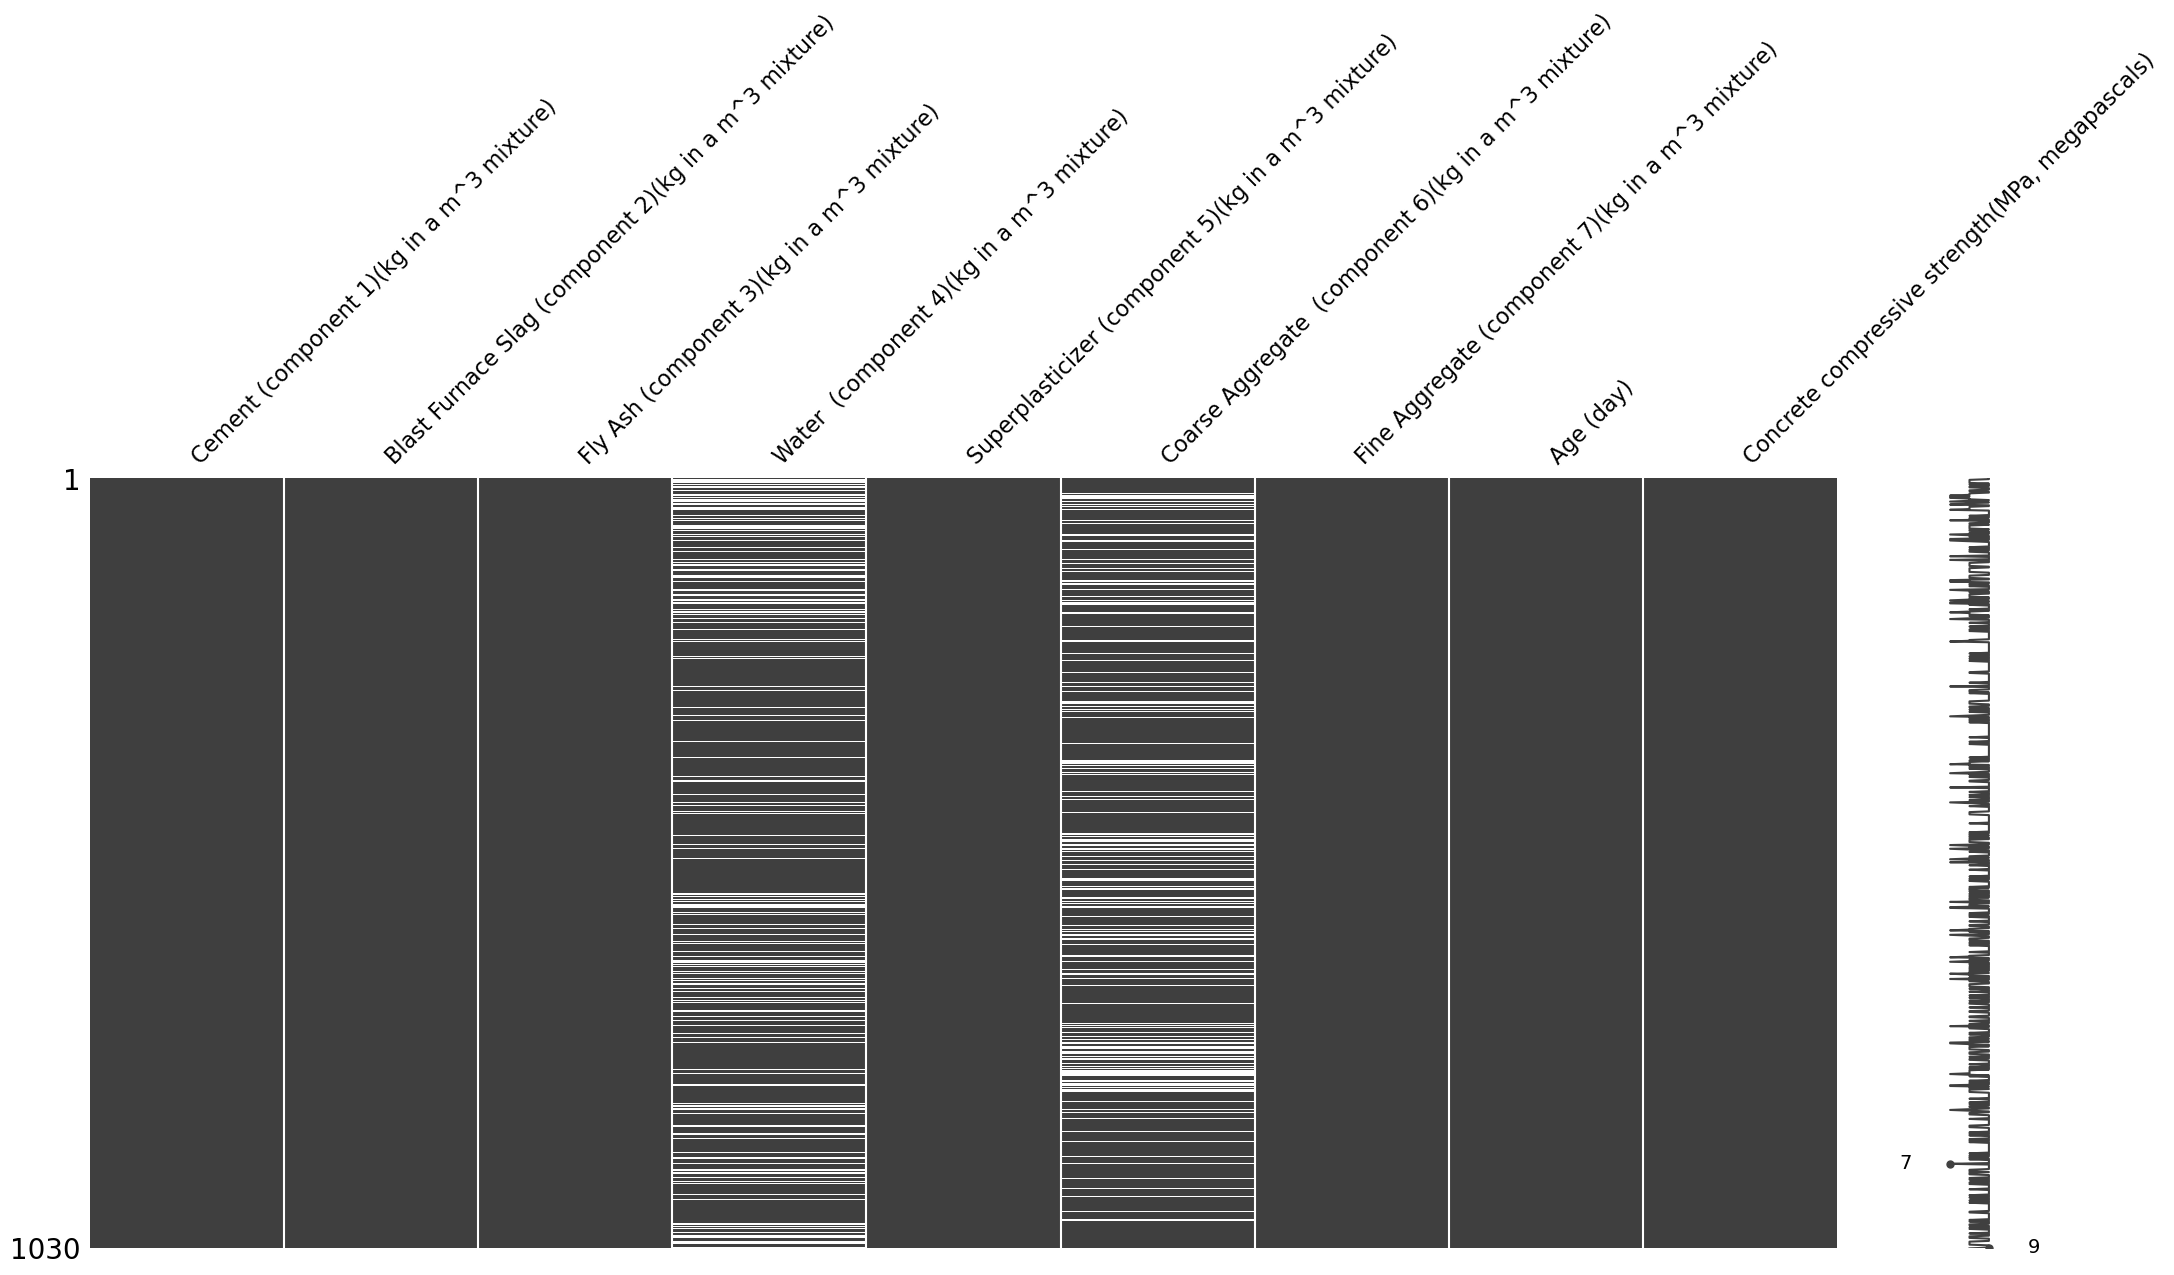

In [133]:
import missingno as msno

msno.matrix(df_mar)

In [134]:
ss=StandardScaler()
mms=MinMaxScaler()

### 3.1.1 Zero imputation:

In [135]:
zero_imputed=zero_imputation(features_mar)
zero_imputed_ss=ss.fit_transform(zero_imputed)
zero_imputed_mms=mms.fit_transform(zero_imputed)

**Linearna regresija:**

In [136]:
ols=LinearRegression()
mar_zero_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, zero_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_zeroi_ols']=np.mean(n_scores)

print('Score for Zero Imputation when data are MAR: ', scores['mar_zeroi_ols'])

Score for Zero Imputation when data are MAR:  0.5714811786326826


**Ridge CV:**

In [137]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, zero_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_zeroi_ridgecv']=np.mean(n_scores)

print('Score for Zero Imputation when data are MAR: ', scores['mar_zeroi_ridgecv'])

Score for Zero Imputation when data are MAR:  0.5715043646193496


**Lasso:**

In [138]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(zero_imputed_ss, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(zero_imputed_ss, target)

scores['mar_zeroi_lasso'] = modelLasso_target.best_score_

print('Score for Zero Imputation when data are MAR: ', scores['mar_zeroi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for Zero Imputation when data are MAR:  0.5705417620825844
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [139]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, zero_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_zeroi_svr']=np.mean(n_scores)

print('Score for Zero Imputation when data are MAR: ', scores['mar_zeroi_svr'])

Score for Zero Imputation when data are MAR:  0.5372170711164479


In [281]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(zero_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(zero_imputed, target)

scores['mar_zeroi_rfr'] = model.best_score_
print('Score for Zero Imputation when data are MAR: ', scores['mar_zeroi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for Zero Imputation when data are MAR:  0.8983725248951119
Value of hyperparameters:  {'max_depth': 19, 'max_features': 1.0, 'n_estimators': 200}


### 3.1.2 Mean imputation:

In [140]:
mean_imputed=mean_imputation(features_mar)
mean_imputed_ss=ss.fit_transform(mean_imputed)
mean_imputed_mms=mms.fit_transform(mean_imputed)

**Linearna regresija:**

In [141]:
ols=LinearRegression()
mar_zero_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, mean_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_meani_ols']=np.mean(n_scores)

print('Score for Mean Imputation when data are MAR: ', scores['mar_meani_ols'])

Score for Mean Imputation when data are MAR:  0.5892939157439723


**Ridge CV:**

In [142]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, mean_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_meani_ridgecv']=np.mean(n_scores)

print('Score for Mean Imputation when data are MAR: ', scores['mar_meani_ridgecv'])

Score for Mean Imputation when data are MAR:  0.5892728484293966


**Lasso:**

In [143]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(mean_imputed_ss, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(mean_imputed_ss, target)

scores['mar_meani_lasso'] = modelLasso_target.best_score_

print('Score for Mean Imputation when data are MAR: ', scores['mar_meani_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for Mean Imputation when data are MAR:  0.5869889228656506
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [144]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, mean_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_meani_svr']=np.mean(n_scores)

print('Score for Mean Imputation when data are MAR: ', scores['mar_meani_svr'])

Score for Mean Imputation when data are MAR:  0.5537412126440315


**Random Forest Regressor:**

In [282]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(mean_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(mean_imputed, target)

scores['mar_meani_rfr'] = model.best_score_
print('Score for Mean Imputation when data are MAR: ', scores['mar_meani_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for Mean Imputation when data are MAR:  0.9034945234503251
Value of hyperparameters:  {'max_depth': 15, 'max_features': 1.0, 'n_estimators': 500}


### 3.1.3 Expectation-Maximization imputation:

In [145]:
em_imputed=impute_em(ss.fit_transform(features_mar))["X_imputed"]

**Linearna regresija:**

In [146]:
ols=LinearRegression()
mar_zero_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, em_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_emi_ols']=np.mean(n_scores)

print('Score for Expectation-Maximization Imputation when data are MAR: ', scores['mar_emi_ols'])

Score for Expectation-Maximization Imputation when data are MAR:  0.6014709572687127


**Ridge CV:**

In [147]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, em_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_emi_ridgecv']=np.mean(n_scores)

print('Score for Expectation-Maximization Imputation when data are MAR: ', scores['mar_emi_ridgecv'])

Score for Expectation-Maximization Imputation when data are MAR:  0.6014483055550761


**Lasso:**

In [148]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(em_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(em_imputed, target)

scores['mar_emi_lasso'] = modelLasso_target.best_score_

print('Score for Expectation-Maximization Imputation when data are MAR: ', scores['mar_emi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for Expectation-Maximization Imputation when data are MAR:  0.6006983159532588
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [149]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, em_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_emi_svr']=np.mean(n_scores)

print('Score for Expectation-Maximization Imputation when data are MAR: ', scores['mar_emi_svr'])

Score for Expectation-Maximization Imputation when data are MAR:  0.5647968309910747


**Random Forest Regressor:**

In [283]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(em_imputed_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(em_imputed, target)

scores['mar_emi_rfr'] = model.best_score_
print('Score for Expectation-Maximization Imputation when data are MAR: ', scores['mar_emi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for Expectation-Maximization Imputation when data are MAR:  0.911497637033297
Value of hyperparameters:  {'max_depth': 18, 'max_features': 1.0, 'n_estimators': 500}


### 3.1.4 Multiple imputation:

In [151]:
ols=LinearRegression()
mar_zero_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, mi_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_mi_ols']=np.mean(n_scores)

print('Score for Multiple Imputation when data are MAR: ', scores['mar_mi_ols'])

Score for Multiple Imputation when data are MAR:  0.5905063287832029


In [150]:
mi_imputed=impute_mi(ss.fit_transform(features_mar))

In [152]:
num_of_datasets=[2,3,4,5,6,7]
num_of_iters=[5,10,15,20,25,30]

In [153]:
plt_scores=[]
labels=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
ols=LinearRegression()
for i in num_of_datasets:
    for j in num_of_iters:
        mi_imputed=impute_mi(ss.fit_transform(features_mar.copy()),i,j)
        n_scores = cross_val_score(ols, mi_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
        plt_scores.append(np.mean(n_scores))
        labels.append("_"+str(i)+"_"+str(j))

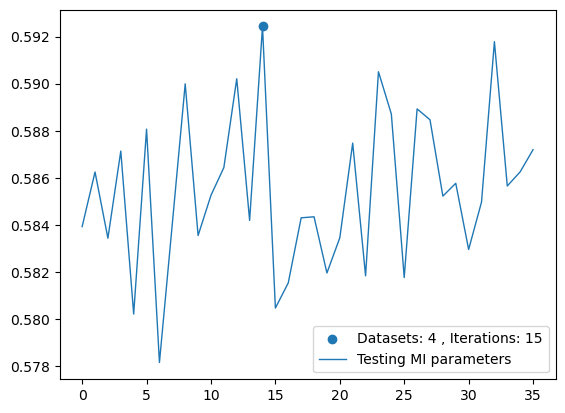

In [154]:
plt_scores_mat = np.array(plt_scores).reshape(6, 6)
ind_of_max=np.where(plt_scores_mat==np.max(plt_scores_mat))
max_score=plt_scores_mat[ind_of_max[0][0], ind_of_max[1][0]]

label="Datasets: "+str(num_of_datasets[ind_of_max[0][0]])+" , Iterations: "+str(num_of_iters[ind_of_max[1][0]])

plt.scatter(x=ind_of_max[0][0]*6+ind_of_max[1][0],y=max_score, label=label)
plt.plot(range(0,len(plt_scores)), plt_scores, lw=1, label = 'Testing MI parameters')
plt.legend()
plt.show()

In [267]:
mi_imputed=impute_mi(ss.fit_transform(features_mar), num_of_ds=4, num_of_iterations=5)

In [156]:
scores['mar_mi_ols'] = np.max(plt_scores)

print('Score for Multiple Imputation when data are MAR: ', scores['mar_mi_ols'])

Score for Multiple Imputation when data are MAR:  0.5924299177909128


**Linearna regresija:**

In [268]:
ols=LinearRegression()
mar_zero_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, mi_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_mi_ols']=np.mean(n_scores)

print('Score for Multiple Imputation when data are MAR: ', scores['mar_mi_ols'])

Score for Multiple Imputation when data are MAR:  0.590208008004627


**RidgeCV:**

In [157]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, mi_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_mi_ridgecv']=np.mean(n_scores)

print('Score for Multiple Imputation when data are MAR: ', scores['mar_mi_ridgecv'])

Score for Multiple Imputation when data are MAR:  0.5901906736575946


**Lasso:**

In [158]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(mi_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(mi_imputed, target)

scores['mar_mi_lasso'] = modelLasso_target.best_score_

print('Score for Multiple Imputation when data are MAR: ', scores['mar_mi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for Multiple Imputation when data are MAR:  0.5883629662751741
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [159]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, mi_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_mi_svr']=np.mean(n_scores)

print('Score for Multiple Imputation when data are MAR: ', scores['mar_mi_svr'])

Score for Multiple Imputation when data are MAR:  0.5619883874235122


**Random forest regressor:**

In [285]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(mi_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(mi_imputed, target)

scores['mar_mi_rfr'] = model.best_score_
print('Score for Multiple Imputation when data are MAR: ', scores['mar_mi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for Multiple Imputation when data are MAR:  0.9041499106887934
Value of hyperparameters:  {'max_depth': 18, 'max_features': 1.0, 'n_estimators': 700}


### 3.1.5 BPCA imputation:

In [160]:
bpca_imputed=bpca_imputation(ss.fit_transform(features_mar))

**Linearna regresija:**

In [161]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, bpca_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_bpcai_ols']=np.mean(n_scores)

print('Score for BPCA Imputation when data are MAR: ', scores['mar_bpcai_ols'])

Score for BPCA Imputation when data are MAR:  0.6001841962775865


**Ridge CV:**

In [162]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, bpca_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_bpcai_ridgecv']=np.mean(n_scores)

print('Score for BPCA Imputation when data are MAR: ', scores['mar_bpcai_ridgecv'])

Score for BPCA Imputation when data are MAR:  0.6002247476122797


**Lasso:**

In [163]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(bpca_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(bpca_imputed, target)

scores['mar_bpcai_lasso'] = modelLasso_target.best_score_

print('Score for BPCA Imputation when data are MAR: ', scores['mar_bpcai_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for BPCA Imputation when data are MAR:  0.6002522208700805
Value of hyperparameter alpha:  {'alpha': 0.5}


**SVR:**

In [164]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, bpca_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_bpcai_svr']=np.mean(n_scores)

print('Score for BPCA Imputation when data are MAR: ', scores['mar_bpcai_svr'])

Score for BPCA Imputation when data are MAR:  0.5593664430347143


**Random Forest Regressor:**

In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(bpca_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(bpca_imputed, target)

scores['mar_bpcai_rfr'] = model.best_score_
print('Score for BPCA Imputation when data are MAR: ', scores['mar_bpcai_svr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for BPCA Imputation when data are MAR:  0.5593664430347143
Value of hyperparameters:  {'max_depth': 18, 'max_features': 1.0, 'n_estimators': 100}


### 3.1.6 KNN imputation:

In [165]:
knn_imputed=knn_imputation(features_mar)

**Linearna regresija:**

In [166]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, knn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_knni_ols']=np.mean(n_scores)

print('Score for KNN Imputation when data are MAR: ', scores['mar_knni_ols'])

Score for KNN Imputation when data are MAR:  0.6022791124722457


**Ridge CV:**

In [167]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, knn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_knni_ridgecv']=np.mean(n_scores)

print('Score for KNN Imputation when data are MAR: ', scores['mar_knni_ridgecv'])

Score for KNN Imputation when data are MAR:  0.6023046762384912


**Lasso:**

In [168]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(knn_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(knn_imputed, target)

scores['mar_knni_lasso'] = modelLasso_target.best_score_

print('Score for KNN Imputation when data are MAR: ', scores['mar_knni_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for KNN Imputation when data are MAR:  0.6022842636948827
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [169]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, knn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_knni_svr']=np.mean(n_scores)

print('Score for KNN Imputation when data are MAR: ', scores['mar_knni_svr'])

Score for KNN Imputation when data are MAR:  0.5635428115750548


**Random forest regressor:**

In [287]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(knn_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(knn_imputed, target)

scores['mar_knni_rfr'] = model.best_score_
print('Score for KNN Imputation when data are MAR: ', scores['mar_knni_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for KNN Imputation when data are MAR:  0.9113252616762291
Value of hyperparameters:  {'max_depth': 17, 'max_features': 1.0, 'n_estimators': 500}


### 3.1.7 Weighted KNN imputation:

In [170]:
wknn_imputed=wknn_imputation(features_mar)

**Linearna regresija:**

In [171]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, wknn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_wknni_ols']=np.mean(n_scores)

print('Score for WKNN Imputation when data are MAR: ', scores['mar_wknni_ols'])

Score for WKNN Imputation when data are MAR:  0.6026550076024838


**Ridge CV:**

In [172]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, wknn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_wknni_ridgecv']=np.mean(n_scores)

print('Score for WKNN Imputation when data are MAR: ', scores['mar_wknni_ridgecv'])

Score for WKNN Imputation when data are MAR:  0.6026807846435093


**Lasso:**

In [173]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(wknn_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(wknn_imputed, target)

scores['mar_wknni_lasso'] = modelLasso_target.best_score_

print('Score for WKNN Imputation when data are MAR: ', scores['mar_wknni_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for WKNN Imputation when data are MAR:  0.6026590488349055
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [174]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, wknn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_wknni_svr']=np.mean(n_scores)

print('Score for WKNN Imputation when data are MAR: ', scores['mar_wknni_svr'])

Score for WKNN Imputation when data are MAR:  0.5645305433932579


**Random forest regressor:**

In [288]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(wknn_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(wknn_imputed, target)

scores['mar_wknni_rfr'] = model.best_score_
print('Score for WKNN Imputation when data are MAR: ', scores['mar_wknni_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for WKNN Imputation when data are MAR:  0.9155280522133354
Value of hyperparameters:  {'max_depth': 17, 'max_features': 1.0, 'n_estimators': 100}


### 3.1.8 K-Means imputation:

In [175]:
from sklearn.cluster import KMeans

observed_rows = np.where(np.isnan(sum(features_mar.T)) == False)[0]
alldata=ss.fit_transform(features_mar[observed_rows,:])

kmeans = KMeans(init='random',  
                n_clusters=6,
                n_init=10,  
                max_iter=300,
                random_state=42)
kmeans.fit(alldata)
kmeans.inertia_

2601.664136992568

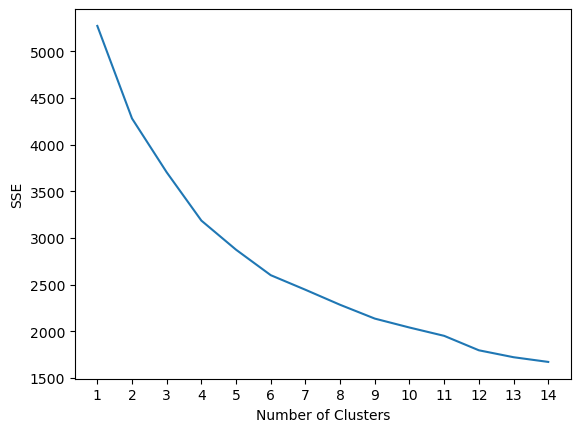

In [176]:
kmeans_kwargs = {'init': 'random',
                 'n_init': 10,
                 'max_iter': 300,
                 'random_state': 42}

sse = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(alldata)
    sse.append(kmeans.inertia_)

plt.plot(range(1,15), sse)
plt.xticks(range(1,15))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [177]:
from kneed import KneeLocator

kl = KneeLocator(range(1,15), sse, curve='convex', direction='decreasing')
kl.elbow

5

In [178]:
km_imputed=kmeans_clustering_imputation(ss.fit_transform(features_mar), 6)

**Linearna regresija:**

In [179]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, km_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_kmi_ols']=np.mean(n_scores)

print('Score for K-Means Imputation when data are MAR: ', scores['mar_kmi_ols'])

Score for K-Means Imputation when data are MAR:  0.60199781102835


**Ridge CV:**

In [180]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, km_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_kmi_ridgecv']=np.mean(n_scores)

print('Score for K-Means Imputation when data are MAR: ', scores['mar_kmi_ridgecv'])

Score for K-Means Imputation when data are MAR:  0.6019885638004662


**Lasso:**

In [181]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(km_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(km_imputed, target)

scores['mar_kmi_lasso'] = modelLasso_target.best_score_

print('Score for K-Means Imputation when data are MAR: ', scores['mar_kmi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for K-Means Imputation when data are MAR:  0.6016380863113466
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [182]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, km_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_kmi_svr']=np.mean(n_scores)

print('Score for K-Means Imputation when data are MAR: ', scores['mar_kmi_svr'])

Score for K-Means Imputation when data are MAR:  0.565137492232713


**Random forest regressor:**

In [289]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(km_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(km_imputed, target)

scores['mar_kmi_rfr'] = model.best_score_
print('Score for K-Means Imputation when data are MAR: ', scores['mar_kmi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for K-Means Imputation when data are MAR:  0.9105530728611886
Value of hyperparameters:  {'max_depth': 17, 'max_features': 1.0, 'n_estimators': 100}


### 3.1.9 Fuzzy K-Means imputation:

In [183]:
# Set up the loop and plot

observed_rows = np.where(np.isnan(sum(features_mar.T)) == False)[0]
alldata=ss.fit_transform(features_mar[observed_rows,:])
num_of_clusters=[2,3,4,5,6,7,8,9,10]
fpcs = []

for ncenters in num_of_clusters:
    cntr, u, u0, d, jm, p, fpc = cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)
    cluster_membership = np.argmax(u, axis=0)

Text(0, 0.5, 'Fuzzy partition coefficient')

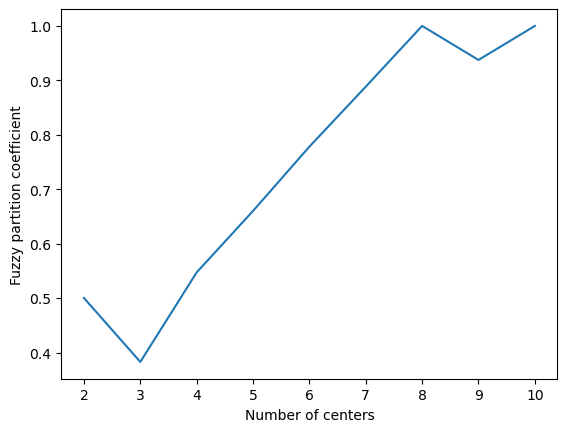

In [184]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11],fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

FPC je definisan u opsegu od 0 do 1, gde je 1 najbolji. To je metrika koja nam govori koliko su podaci dobro opisani određenim modelom. Skup podataka se grupiše na između 2 i 10 klastera, a zatim su prikazani rezultati grupisanja, tj. FPC, na y osi. Kada je FPC uvećan, podaci se najbolje opisuju. Na osnovu grafika, odlučeno je da se Fuzzy K-Means imputacija obavi sa 8 klastera.

In [185]:
fcm=FCMeansEstimator(8,2,(ss.fit_transform(features_mar)))
fcm_imputed=fcm.estimate_missing_values()

**Linearna regresija:**

In [186]:
ols=LinearRegression()
mar_fcm_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, fcm_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_fcmi_ols']=np.mean(n_scores)

print('Score for FCM Imputation when data are MAR: ', scores['mar_fcmi_ols'])

Score for FCM Imputation when data are MAR:  0.5892910676530332


**Ridge CV:**

In [271]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, zero_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_fcmi_ridgecv']=np.mean(n_scores)

print('Score for Zero Imputation when data are MAR: ', scores['mar_fcmi_ridgecv'])

Score for Zero Imputation when data are MAR:  0.5715043646193496


**Lasso:**

In [188]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(fcm_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(fcm_imputed, target)

scores['mar_fcmi_lasso'] = modelLasso_target.best_score_

print('Score for FCM Imputation when data are MAR: ', scores['mar_fcmi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for FCM Imputation when data are MAR:  0.5870472816273835
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [189]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, fcm_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_fcmi_svr']=np.mean(n_scores)

print('Score for FCM Imputation when data are MAR: ', scores['mar_fcmi_svr'])

Score for FCM Imputation when data are MAR:  0.5541304613366017


**Random forest regressor:**

In [290]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(fcm_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(fcm_imputed, target)

scores['mar_fcmi_rfr'] = model.best_score_
print('Score for FCM Imputation when data are MAR: ', scores['mar_fcmi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for FCM Imputation when data are MAR:  0.900353118253655
Value of hyperparameters:  {'max_depth': 17, 'max_features': 1.0, 'n_estimators': 700}


### 3.10 SVR imputation:

In [191]:
svr_imputed=svr_imputation(ss.fit_transform(features_mar))

**Linearna regresija:**

In [192]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, svr_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_svri_ols']=np.mean(n_scores)

print('Score for SVR Imputation when data are MAR: ', scores['mar_svri_ols'])

Score for SVR Imputation when data are MAR:  0.5922621639156054


**Ridge CV:**

In [193]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, svr_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_svri_ridgecv']=np.mean(n_scores)

print('Score for SVR Imputation when data are MAR: ', scores['mar_svri_ridgecv'])

Score for SVR Imputation when data are MAR:  0.5922474063194578


**Lasso:**

In [194]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(svr_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(svr_imputed, target)

scores['mar_svri_lasso'] = modelLasso_target.best_score_

print('Score for SVR Imputation when data are MAR: ', scores['mar_svri_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for SVR Imputation when data are MAR:  0.5908857320192149
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [195]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, svr_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_svri_svr']=np.mean(n_scores)

print('Score for SVR Imputation when data are MAR: ', scores['mar_svri_svr'])

Score for SVR Imputation when data are MAR:  0.5569276298405742


**Random forest regressor:**

In [291]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(svr_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(svr_imputed, target)

scores['mar_svri_rfr'] = model.best_score_
print('Score for SVR Imputation when data are MAR: ', scores['mar_svri_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for SVR Imputation when data are MAR:  0.8999779587968773
Value of hyperparameters:  {'max_depth': 19, 'max_features': 1.0, 'n_estimators': 500}


### 3.11 SVD Imputation:

In [209]:
u,s,v=np.linalg.svd(mean_imputation(ss.fit_transform(features_mar)))
s

array([45.62197336, 37.09076301, 35.96870979, 31.30264954, 30.47968635,
       28.93597097, 16.06563061,  8.11792532])

In [210]:
svd_imputed=impute_svd(ss.fit_transform(features_mar), rank=6)

Convergence achieved after 2 iterations.


**Linearna regresija:**

In [211]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, svd_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_svdi_ols']=np.mean(n_scores)

print('Score for SVD Imputation when data are MAR: ', scores['mar_svdi_ols'])

Score for SVD Imputation when data are MAR:  0.5927549785665407


**Ridge CV:**

In [212]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, svd_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_svdi_ridgecv']=np.mean(n_scores)

print('Score for SVD Imputation when data are MAR: ', scores['mar_svdi_ridgecv'])

Score for SVD Imputation when data are MAR:  0.5927329660256702


**Lasso:**

In [213]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(svd_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(svd_imputed, target)

scores['mar_svdi_lasso'] = modelLasso_target.best_score_

print('Score for SVD Imputation when data are MAR: ', scores['mar_svdi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for SVD Imputation when data are MAR:  0.589836986364666
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [214]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, svd_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores['mar_svdi_svr']=np.mean(n_scores)

print('Score for SVD Imputation when data are MAR: ', scores['mar_svdi_svr'])

Score for SVD Imputation when data are MAR:  0.5558213500269666


**Random forest regressor:**

In [292]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(svd_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(svd_imputed, target)

scores['mar_svdi_rfr'] = model.best_score_
print('Score for SVD Imputation when data are MAR: ', scores['mar_svdi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for SVD Imputation when data are MAR:  0.9095068490370813
Value of hyperparameters:  {'max_depth': 19, 'max_features': 1.0, 'n_estimators': 200}


### 3.12 Objedinjeni rezultati:

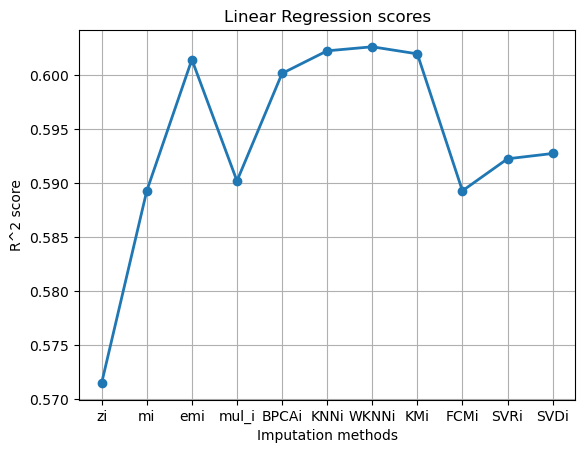

In [272]:
values = []
keys_with_ols = [key for key in scores.keys() if 'ols' in key]
for key in keys_with_ols:
    values.append(scores.get(key))
x=["zi","mi","emi","mul_i","BPCAi","KNNi","WKNNi","KMi","FCMi","SVRi","SVDi"]
plt.plot(x,values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Imputation methods')
plt.ylabel('R^2 score')
plt.title('Linear Regression scores')
plt.grid(True)
plt.show()

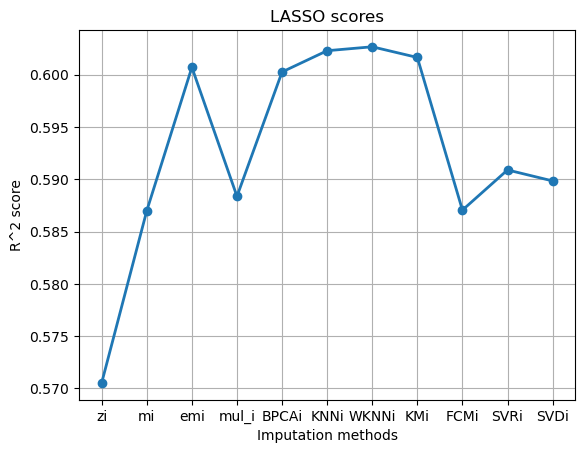

In [274]:
values = []
keys_with_ols = [key for key in scores.keys() if 'lasso' in key]
for key in keys_with_ols:
    values.append(scores.get(key))
x=["zi","mi","emi","mul_i","BPCAi","KNNi","WKNNi","KMi","FCMi","SVRi","SVDi"]
plt.plot(x,values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Imputation methods')
plt.ylabel('R^2 score')
plt.title('LASSO scores')
plt.grid(True)
plt.show()

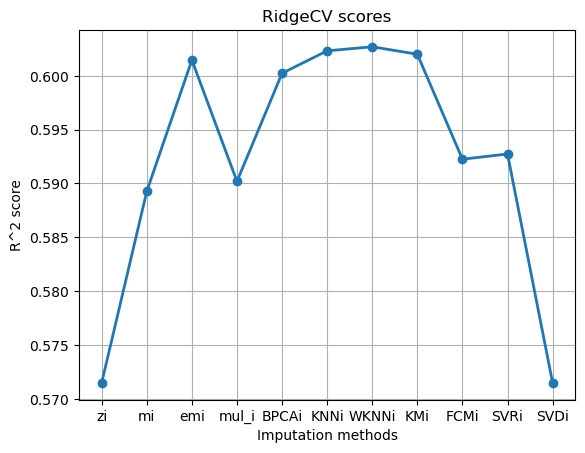

In [275]:
values = []
keys_with_ols = [key for key in scores.keys() if 'ridgecv' in key]
for key in keys_with_ols:
    values.append(scores.get(key))
x=["zi","mi","emi","mul_i","BPCAi","KNNi","WKNNi","KMi","FCMi","SVRi","SVDi"]
plt.plot(x,values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Imputation methods')
plt.ylabel('R^2 score')
plt.title('RidgeCV scores')
plt.grid(True)
plt.show()

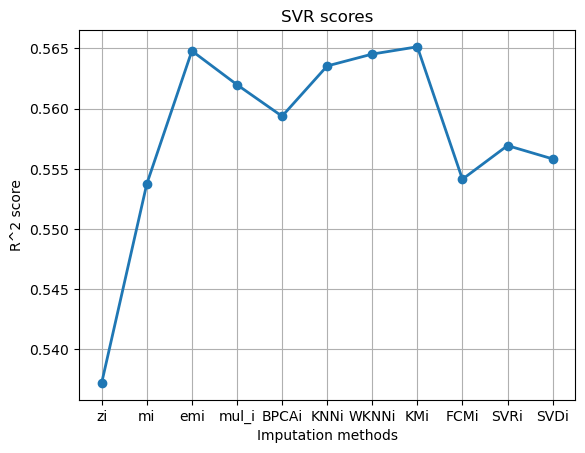

In [280]:
values = []
keys_with_ols = [key for key in scores.keys() if 'i_svr' in key]
for key in keys_with_ols:
    values.append(scores.get(key))
x=["zi","mi","emi","mul_i","BPCAi","KNNi","WKNNi","KMi","FCMi","SVRi","SVDi"]
plt.plot(x,values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Imputation methods')
plt.ylabel('R^2 score')
plt.title('SVR scores')
plt.grid(True)
plt.show()

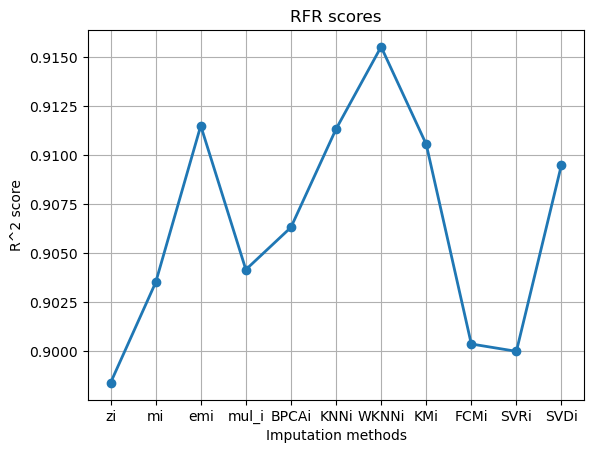

In [293]:
values = []
keys_with_ols = [key for key in scores.keys() if 'rfr' in key]
for key in keys_with_ols:
    values.append(scores.get(key))
x=["zi","mi","emi","mul_i","BPCAi","KNNi","WKNNi","KMi","FCMi","SVRi","SVDi"]
plt.plot(x,values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Imputation methods')
plt.ylabel('R^2 score')
plt.title('RFR scores')
plt.grid(True)
plt.show()

In [295]:
scores['mar_wknni_rfr']

0.9155280522133354

### 3.2 MCAR slucaj:

Kreiranje skupa podataka na osnovu originalnog čije nedostajuće vrednosti prate MCAR mehanizam.

In [4]:
np.random.seed(1)
result = produce_NA(features, p_miss=0.2, mecha="MCAR")
features_mar=result['X_incomp']
R_mar = result['mask']

df_mcar=pd.DataFrame(data=np.concatenate((features_mar,target.reshape(-1,1)),axis=1), columns=dataframe.columns)

In [5]:
features_mcar=df_mcar[df_mcar.columns[:-1]].to_numpy()
target=df_mcar[df_mcar.columns[-1]].to_numpy()

In [6]:
df_mcar.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                197
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    189
Fly Ash (component 3)(kg in a m^3 mixture)               224
Water  (component 4)(kg in a m^3 mixture)                199
Superplasticizer (component 5)(kg in a m^3 mixture)      192
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     202
Fine Aggregate (component 7)(kg in a m^3 mixture)        189
Age (day)                                                216
Concrete compressive strength(MPa, megapascals)            0
dtype: int64

<Axes: >

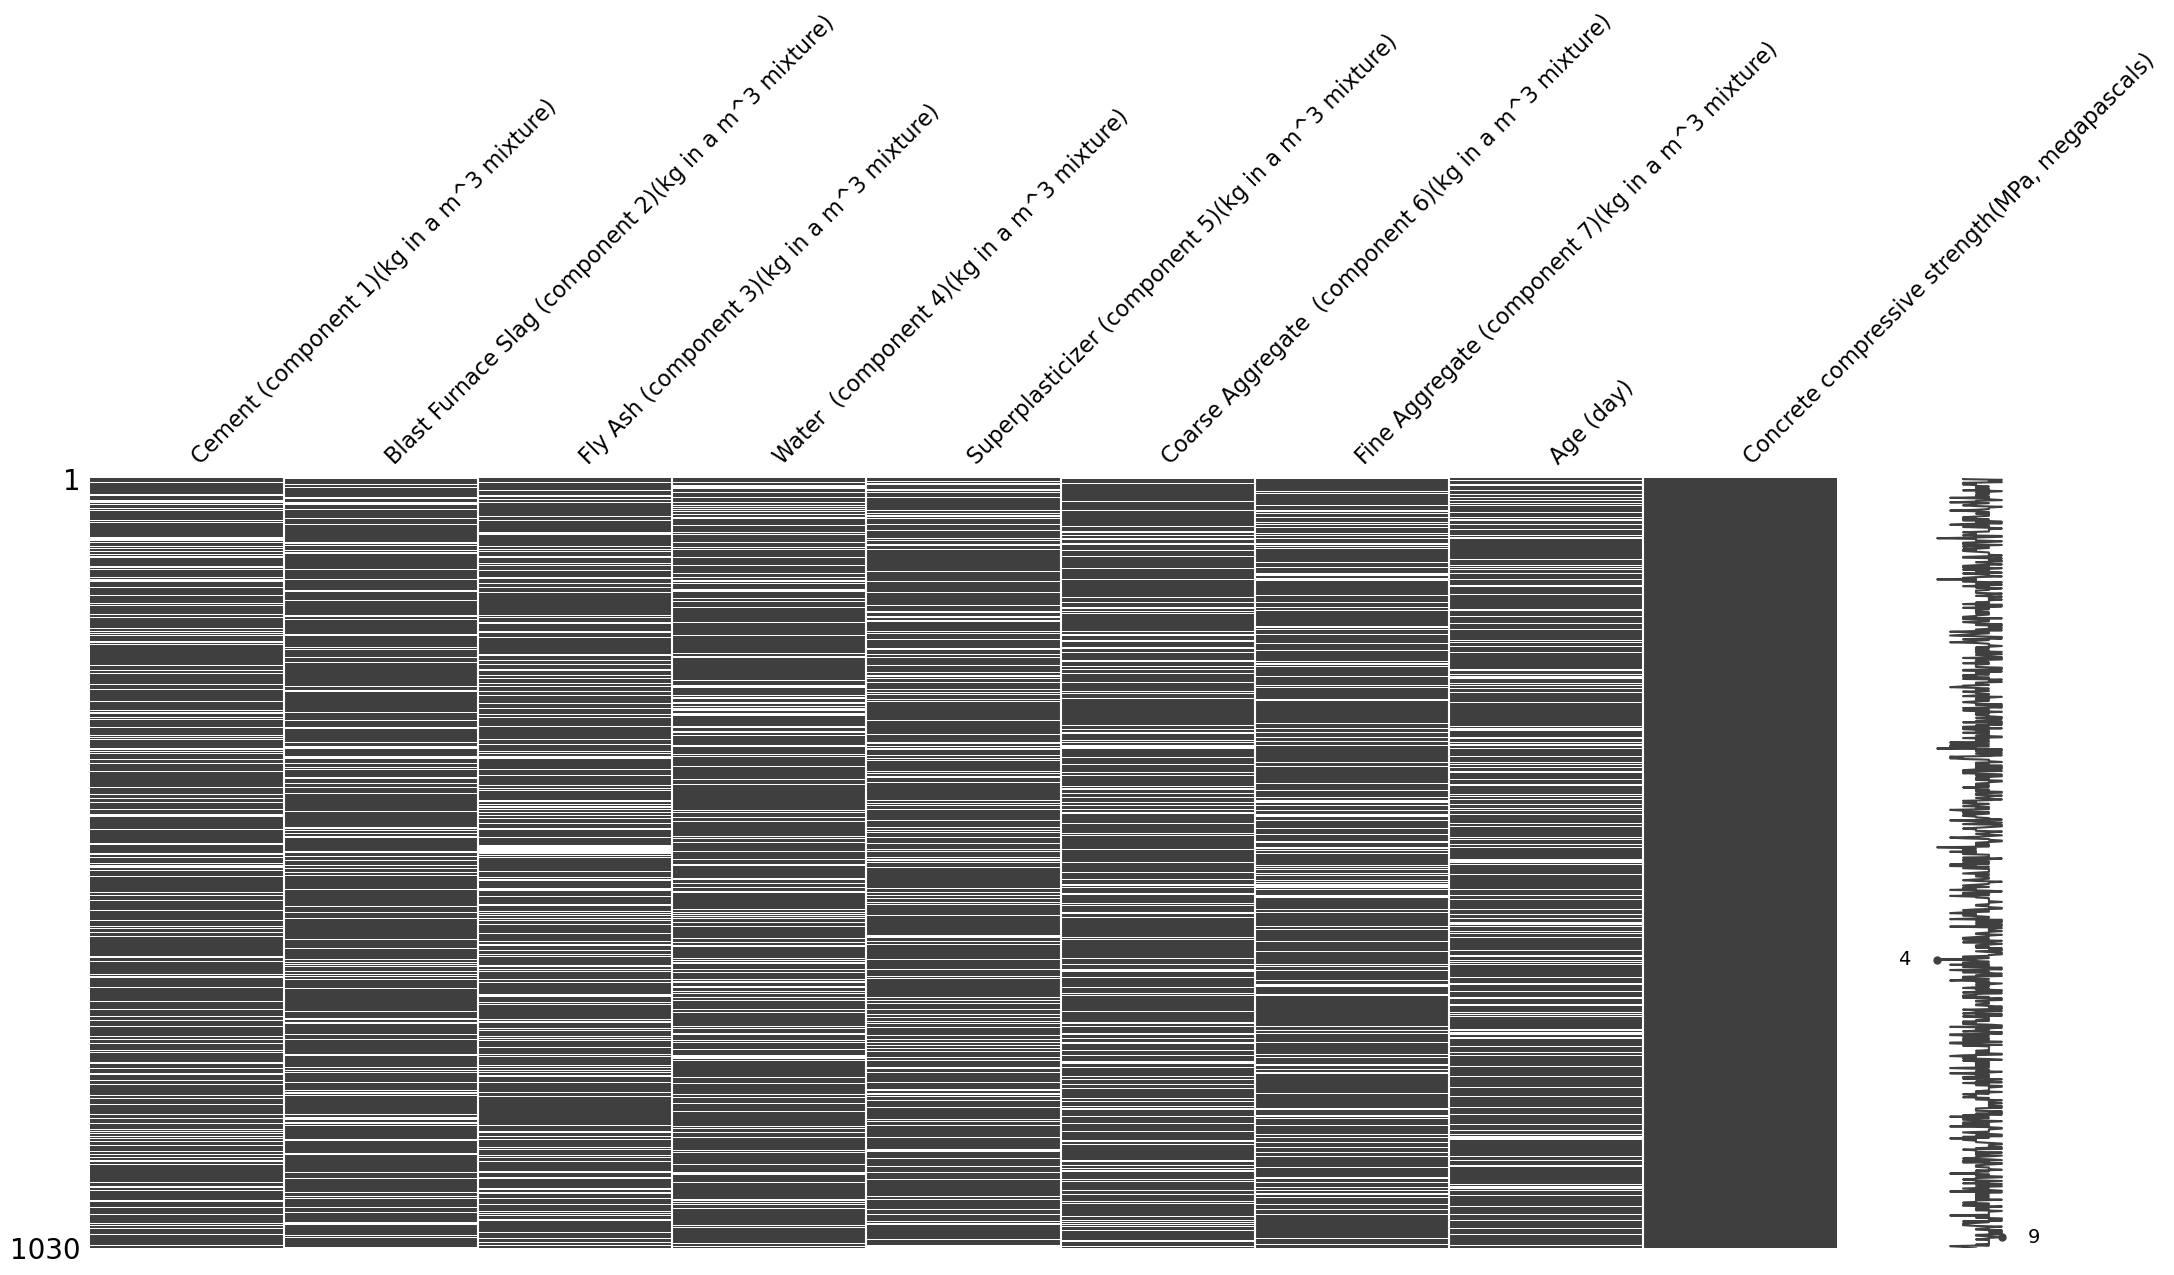

In [299]:
import missingno as msno

msno.matrix(df_mcar)

In [7]:
ss=StandardScaler()
mms=MinMaxScaler()
scores_mcar={}

### 3.2.1 Zero imputation:

In [300]:
zero_imputed=zero_imputation(features_mcar)
zero_imputed_ss=ss.fit_transform(zero_imputed)
zero_imputed_mms=mms.fit_transform(zero_imputed)

**Linearna regresija:**

In [304]:
ols=LinearRegression()
mar_zero_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, zero_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_zeroi_ols']=np.mean(n_scores)

print('Score for Zero Imputation when data are MCAR: ', scores_mcar['mcar_zeroi_ols'])

Score for Zero Imputation when data are MCAR:  0.2640780000871442


**Ridge CV:**

In [307]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, zero_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_zeroi_ridgecv']=np.mean(n_scores)

print('Score for Zero Imputation when data are MCAR: ', scores_mcar['mcar_zeroi_ridgecv'])

Score for Zero Imputation when data are MCAR:  0.2644252359190797


**Lasso:**

In [309]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(zero_imputed_ss, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(zero_imputed_ss, target)

scores_mcar['mcar_zeroi_lasso'] = modelLasso_target.best_score_

print('Score for Zero Imputation when data are MCAR: ', scores_mcar['mcar_zeroi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for Zero Imputation when data are MCAR:  0.2649544850130312
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [310]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, zero_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_zeroi_svr']=np.mean(n_scores)

print('Score for Zero Imputation when data are MCAR: ', scores_mcar['mcar_zeroi_svr'])

Score for Zero Imputation when data are MCAR:  0.25074069561211515


In [311]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(zero_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(zero_imputed, target)

scores_mcar['mcar_zeroi_rfr'] = model.best_score_
print('Score for Zero Imputation when data are MCAR: ', scores_mcar['mcar_zeroi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for Zero Imputation when data are MCAR:  0.659217394563884
Value of hyperparameters:  {'max_depth': 13, 'max_features': 1.0, 'n_estimators': 700}


### 3.2.2 Mean imputation:

In [313]:
mean_imputed=mean_imputation(features_mcar)
mean_imputed_ss=ss.fit_transform(mean_imputed)
mean_imputed_mms=mms.fit_transform(mean_imputed)

**Linearna regresija:**

In [314]:
ols=LinearRegression()
mar_zero_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, mean_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_meani_ols']=np.mean(n_scores)

print('Score for Mean Imputation when data are MCAR: ', scores_mcar['mcar_meani_ols'])

Score for Mean Imputation when data are MCAR:  0.4619899612864836


**Ridge CV:**

In [315]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, mean_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_meani_ridgecv']=np.mean(n_scores)

print('Score for Mean Imputation when data are MCAR: ', scores_mcar['mcar_meani_ridgecv'])

Score for Mean Imputation when data are MCAR:  0.4623721734297108


**Lasso:**

In [316]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(mean_imputed_ss, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(mean_imputed_ss, target)

scores_mcar['mcar_meani_lasso'] = modelLasso_target.best_score_

print('Score for Mean Imputation when data are MCAR: ', scores_mcar['mcar_meani_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for Mean Imputation when data are MCAR:  0.4630464167461826
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [317]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, mean_imputed_ss, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_meani_svr']=np.mean(n_scores)

print('Score for Mean Imputation when data are MAR: ', scores_mcar['mcar_meani_svr'])

Score for Mean Imputation when data are MAR:  0.4421165738660708


**Random Forest Regressor:**

In [318]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(mean_imputed_ss, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(mean_imputed_ss, target)

scores_mcar['mcar_meani_rfr'] = model.best_score_
print('Score for Mean Imputation when data are MCAR: ', scores_mcar['mcar_meani_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for Mean Imputation when data are MCAR:  0.7406449204513154
Value of hyperparameters:  {'max_depth': 19, 'max_features': 1.0, 'n_estimators': 100}


### 3.2.3 Expectation-Maximization imputation:

In [319]:
em_imputed=impute_em(ss.fit_transform(features_mcar))["X_imputed"]

**Linearna regresija:**

In [320]:
ols=LinearRegression()
mar_zero_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, em_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_emi_ols']=np.mean(n_scores)

print('Score for Expectation-Maximization Imputation when data are MCAR: ', scores_mcar['mcar_emi_ols'])

Score for Expectation-Maximization Imputation when data are MCAR:  0.5134898504663032


**Ridge CV:**

In [321]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, em_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_emi_ridgecv']=np.mean(n_scores)

print('Score for Expectation-Maximization Imputation when data are MCAR: ', scores_mcar['mcar_emi_ridgecv'])

Score for Expectation-Maximization Imputation when data are MCAR:  0.5131957120914551


**Lasso:**

In [322]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(em_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(em_imputed, target)

scores_mcar['mcar_emi_lasso'] = modelLasso_target.best_score_

print('Score for Expectation-Maximization Imputation when data are MCAR: ', scores_mcar['mcar_emi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for Expectation-Maximization Imputation when data are MCAR:  0.5120309842934376
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [323]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, em_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_emi_svr']=np.mean(n_scores)

print('Score for Expectation-Maximization Imputation when data are MCAR: ', scores_mcar['mcar_emi_svr'])

Score for Expectation-Maximization Imputation when data are MCAR:  0.49959244397326713


**Random Forest Regressor:**

In [324]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(em_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(em_imputed, target)

scores_mcar['mcar_emi_rfr'] = model.best_score_
print('Score for Expectation-Maximization Imputation when data are MCAR: ', scores_mcar['mcar_emi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for Expectation-Maximization Imputation when data are MCAR:  0.745946052869541
Value of hyperparameters:  {'max_depth': 15, 'max_features': 1.0, 'n_estimators': 500}


### 3.2.4 Multiple imputation:

In [326]:
mi_imputed=impute_mi(ss.fit_transform(features_mcar))

In [327]:
num_of_datasets=[2,3,4,5,6,7]
num_of_iters=[5,10,15,20,25,30]

In [328]:
plt_scores=[]
labels=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
ols=LinearRegression()
for i in num_of_datasets:
    for j in num_of_iters:
        mi_imputed=impute_mi(ss.fit_transform(features_mcar.copy()),i,j)
        n_scores = cross_val_score(ols, mi_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
        plt_scores.append(np.mean(n_scores))
        labels.append("_"+str(i)+"_"+str(j))

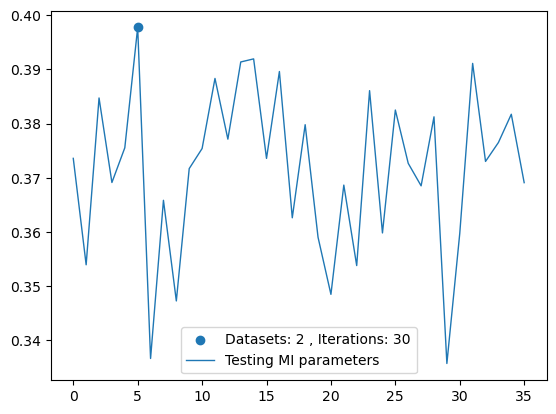

In [329]:
plt_scores_mat = np.array(plt_scores).reshape(6, 6)
ind_of_max=np.where(plt_scores_mat==np.max(plt_scores_mat))
max_score=plt_scores_mat[ind_of_max[0][0], ind_of_max[1][0]]

label="Datasets: "+str(num_of_datasets[ind_of_max[0][0]])+" , Iterations: "+str(num_of_iters[ind_of_max[1][0]])

plt.scatter(x=ind_of_max[0][0]*6+ind_of_max[1][0],y=max_score, label=label)
plt.plot(range(0,len(plt_scores)), plt_scores, lw=1, label = 'Testing MI parameters')
plt.legend()
plt.show()

In [331]:
mi_imputed=impute_mi(ss.fit_transform(features_mcar), num_of_ds=2, num_of_iterations=30)

**Linearna regresija:**

In [332]:
ols=LinearRegression()
mar_zero_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, mi_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_mi_ols']=np.mean(n_scores)

print('Score for Multiple Imputation when data are MCAR: ', scores_mcar['mcar_mi_ols'])

Score for Multiple Imputation when data are MCAR:  0.3977258446501707


**RidgeCV:**

In [334]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv= KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, mi_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_mi_ridgecv']=np.mean(n_scores)

print('Score for Multiple Imputation when data are MCAR: ', scores_mcar['mcar_mi_ridgecv'])

Score for Multiple Imputation when data are MCAR:  0.398198218365862


**Lasso:**

In [335]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(mi_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(mi_imputed, target)

scores_mcar['mcar_mi_lasso'] = modelLasso_target.best_score_

print('Score for Multiple Imputation when data are MCAR: ', scores_mcar['mcar_mi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for Multiple Imputation when data are MCAR:  0.3979325973353921
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [336]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, mi_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_mi_svr']=np.mean(n_scores)

print('Score for Multiple Imputation when data are MCAR: ', scores_mcar['mcar_mi_svr'])

Score for Multiple Imputation when data are MCAR:  0.39335309424923826


**Random forest regressor:**

In [337]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(mi_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(mi_imputed, target)

scores_mcar['mcar_mi_rfr'] = model.best_score_
print('Score for Multiple Imputation when data are MCAR: ', scores_mcar['mcar_mi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for Multiple Imputation when data are MCAR:  0.625724967314697
Value of hyperparameters:  {'max_depth': 19, 'max_features': 'sqrt', 'n_estimators': 200}


### 3.2.5 BPCA imputation:

In [341]:
bpca_imputed=bpca_imputation(ss.fit_transform(features_mcar))

**Linearna regresija:**

In [342]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, bpca_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_bpcai_ols']=np.mean(n_scores)

print('Score for BPCA Imputation when data are MCAR: ', scores_mcar['mcar_bpcai_ols'])

Score for BPCA Imputation when data are MCAR:  0.4550239572497782


**Ridge CV:**

In [343]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, bpca_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_bpcai_ridgecv']=np.mean(n_scores)

print('Score for BPCA Imputation when data are MCAR: ', scores_mcar['mcar_bpcai_ridgecv'])

Score for BPCA Imputation when data are MCAR:  0.45546159920804935


**Lasso:**

In [344]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(bpca_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(bpca_imputed, target)

scores_mcar['mcar_bpcai_lasso'] = modelLasso_target.best_score_

print('Score for BPCA Imputation when data are MCAR: ', scores_mcar['mcar_bpcai_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for BPCA Imputation when data are MCAR:  0.455476998306545
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [345]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, bpca_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_bpcai_svr']=np.mean(n_scores)

print('Score for BPCA Imputation when data are MCAR: ', scores_mcar['mcar_bpcai_svr'])

Score for BPCA Imputation when data are MCAR:  0.4381787779570548


**Random Forest Regressor:**

In [346]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(bpca_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(bpca_imputed, target)

scores_mcar['mcar_bpcai_rfr'] = model.best_score_
print('Score for BPCA Imputation when data are MCAR: ', scores_mcar['mcar_bpcai_svr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for BPCA Imputation when data are MCAR:  0.4381787779570548
Value of hyperparameters:  {'max_depth': 18, 'max_features': 1.0, 'n_estimators': 500}


### 3.2.6 KNN imputation:

In [347]:
knn_imputed=knn_imputation(ss.fit_transform(features_mcar))

**Linearna regresija:**

In [348]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, knn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_knni_ols']=np.mean(n_scores)

print('Score for KNN Imputation when data are MCAR: ', scores_mcar['mcar_knni_ols'])

Score for KNN Imputation when data are MCAR:  0.511373066314367


**Ridge CV:**

In [349]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, knn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_knni_ridgecv']=np.mean(n_scores)

print('Score for KNN Imputation when data are MCAR: ', scores_mcar['mcar_knni_ridgecv'])

Score for KNN Imputation when data are MCAR:  0.5112255410590192


**Lasso:**

In [350]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(knn_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(knn_imputed, target)

scores_mcar['mcar_knni_lasso'] = modelLasso_target.best_score_

print('Score for KNN Imputation when data are MCAR: ', scores_mcar['mcar_knni_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for KNN Imputation when data are MCAR:  0.5111472036877192
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [351]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, knn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_knni_svr']=np.mean(n_scores)

print('Score for KNN Imputation when data are MCAR: ', scores_mcar['mcar_knni_svr'])

Score for KNN Imputation when data are MCAR:  0.4891900049265949


**Random forest regressor:**

In [352]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(knn_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(knn_imputed, target)

scores_mcar['mcar_knni_rfr'] = model.best_score_
print('Score for KNN Imputation when data are MCAR: ', scores_mcar['mcar_knni_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for KNN Imputation when data are MCAR:  0.7376243186067419
Value of hyperparameters:  {'max_depth': 19, 'max_features': 1.0, 'n_estimators': 500}


### 3.2.7 Weighted KNN imputation:

In [387]:
wknn_imputed=wknn_imputation(ss.fit_transform(features_mcar))

**Linearna regresija:**

In [388]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, wknn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_wknni_ols']=np.mean(n_scores)

print('Score for WKNN Imputation when data are MCAR: ', scores_mcar['mcar_wknni_ols'])

Score for WKNN Imputation when data are MCAR:  0.49111450608660173


**Ridge CV:**

In [354]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, wknn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_wknni_ridgecv']=np.mean(n_scores)

print('Score for WKNN Imputation when data are MCAR: ', scores_mcar['mcar_wknni_ridgecv'])

Score for WKNN Imputation when data are MCAR:  0.49114212676826446


**Lasso:**

In [355]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(wknn_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(wknn_imputed, target)

scores_mcar['mcar_wknni_lasso'] = modelLasso_target.best_score_

print('Score for WKNN Imputation when data are MCAR: ', scores_mcar['mcar_wknni_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for WKNN Imputation when data are MCAR:  0.4908790640696708
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [356]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, wknn_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_wknni_svr']=np.mean(n_scores)

print('Score for WKNN Imputation when data are MCAR: ', scores_mcar['mcar_wknni_svr'])

Score for WKNN Imputation when data are MCAR:  0.4680347627471134


**Random forest regressor:**

In [357]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(wknn_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(wknn_imputed, target)

scores_mcar['mcar_wknni_rfr'] = model.best_score_
print('Score for WKNN Imputation when data are MCAR: ', scores_mcar['mcar_wknni_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for WKNN Imputation when data are MCAR:  0.7235594203528033
Value of hyperparameters:  {'max_depth': 15, 'max_features': 1.0, 'n_estimators': 700}


### 3.2.8 K-Means imputation:

In [8]:
from sklearn.cluster import KMeans

observed_rows = np.where(np.isnan(sum(features_mcar.T)) == False)[0]
alldata=ss.fit_transform(features_mcar[observed_rows,:])

kmeans = KMeans(init='random',  
                n_clusters=6,
                n_init=10,  
                max_iter=300,
                random_state=42)
kmeans.fit(alldata)
kmeans.inertia_

606.895931950743

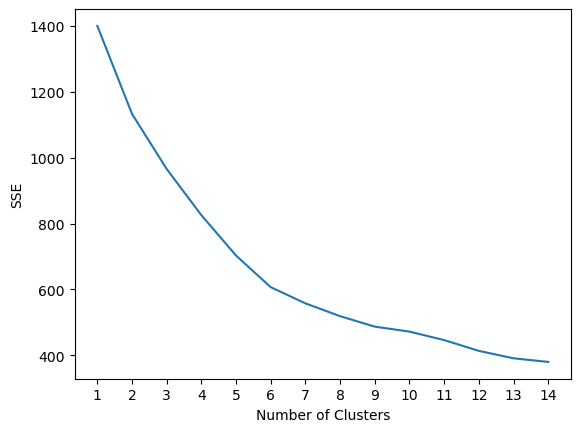

In [9]:
kmeans_kwargs = {'init': 'random',
                 'n_init': 10,
                 'max_iter': 300,
                 'random_state': 42}

sse = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(alldata)
    sse.append(kmeans.inertia_)

plt.plot(range(1,15), sse)
plt.xticks(range(1,15))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [10]:
from kneed import KneeLocator

kl = KneeLocator(range(1,15), sse, curve='convex', direction='decreasing')
kl.elbow

6

In [32]:
km_imputed=kmeans_clustering_imputation(ss.fit_transform(features_mcar), 6)

**Linearna regresija:**

In [33]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, km_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_kmi_ols']=np.mean(n_scores)

print('Score for K-Means Imputation when data are MCAR: ', scores_mcar['mcar_kmi_ols'])

Score for K-Means Imputation when data are MCAR:  0.5270993607514082


**Ridge CV:**

In [36]:
from sklearn.linear_model import RidgeCV

ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, km_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_kmi_ridgecv']=np.mean(n_scores)

print('Score for K-Means Imputation when data are MCAR: ', scores_mcar['mcar_kmi_ridgecv'])

Score for K-Means Imputation when data are MCAR:  0.5270467977643518


**Lasso:**

In [39]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    


parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(km_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(km_imputed, target)

scores_mcar['mcar_kmi_lasso'] = modelLasso_target.best_score_

print('Score for K-Means Imputation when data are MCAR: ', scores_mcar['mcar_kmi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for K-Means Imputation when data are MCAR:  0.527021831917226
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [41]:
from sklearn.svm import SVR
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, km_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_kmi_svr']=np.mean(n_scores)

print('Score for K-Means Imputation when data are MCAR: ', scores_mcar['mcar_kmi_svr'])

Score for K-Means Imputation when data are MCAR:  0.5128658506799618


**Random forest regressor:**

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(km_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(km_imputed, target)

scores_mcar['mcar_kmi_rfr'] = model.best_score_
print('Score for K-Means Imputation when data are MCAR: ', scores_mcar['mcar_kmi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for K-Means Imputation when data are MCAR:  0.7419726231462918
Value of hyperparameters:  {'max_depth': 11, 'max_features': 1.0, 'n_estimators': 700}


### 3.2.9 Fuzzy K-Means imputation:

In [385]:
# Set up the loop and plot

observed_rows = np.where(np.isnan(sum(features_mcar.T)) == False)[0]
alldata=ss.fit_transform(features_mcar[observed_rows,:])
num_of_clusters=[2,3,4,5,6,7,8,9,10]
fpcs = []

for ncenters in num_of_clusters:
    cntr, u, u0, d, jm, p, fpc = cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)
    cluster_membership = np.argmax(u, axis=0)

Text(0, 0.5, 'Fuzzy partition coefficient')

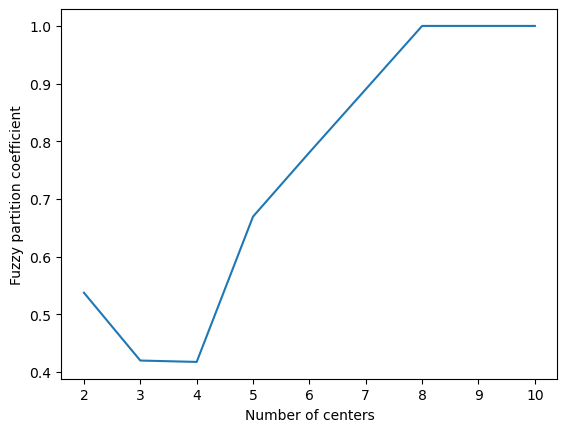

In [386]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11],fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

FPC je definisan u opsegu od 0 do 1, gde je 1 najbolji. To je metrika koja nam govori koliko su podaci dobro opisani određenim modelom. Skup podataka se grupiše na između 2 i 10 klastera, a zatim su prikazani rezultati grupisanja, tj. FPC, na y osi. Kada je FPC uvećan, podaci se najbolje opisuju. Na osnovu grafika, odlučeno je da se Fuzzy K-Means imputacija obavi sa 8 klastera.

In [367]:
fcm=FCMeansEstimator(8,2,(ss.fit_transform(features_mcar)))
fcm_imputed=fcm.estimate_missing_values()

**Linearna regresija:**

In [368]:
ols=LinearRegression()
mar_fcm_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, fcm_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_fcmi_ols']=np.mean(n_scores)

print('Score for FCM Imputation when data are MCAR: ', scores_mcar['mcar_fcmi_ols'])

Score for FCM Imputation when data are MCAR:  0.4548661508695705


**Ridge CV:**

In [369]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, fcm_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_fcmi_ridgecv']=np.mean(n_scores)

print('Score for Zero Imputation when data are MCAR: ', scores_mcar['mcar_fcmi_ridgecv'])

Score for Zero Imputation when data are MCAR:  0.45525661071229484


**Lasso:**

In [370]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(fcm_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(fcm_imputed, target)

scores_mcar['mcar_fcmi_lasso'] = modelLasso_target.best_score_

print('Score for FCM Imputation when data are MCAR: ', scores_mcar['mcar_fcmi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for FCM Imputation when data are MCAR:  0.45598494501821724
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [371]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, fcm_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_fcmi_svr']=np.mean(n_scores)

print('Score for FCM Imputation when data are MCAR: ', scores_mcar['mcar_fcmi_svr'])

Score for FCM Imputation when data are MCAR:  0.4380268359169369


**Random forest regressor:**

In [372]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(fcm_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(fcm_imputed, target)

scores_mcar['mcar_fcmi_rfr'] = model.best_score_
print('Score for FCM Imputation when data are MCAR: ', scores_mcar['mcar_fcmi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for FCM Imputation when data are MCAR:  0.7326940079497877
Value of hyperparameters:  {'max_depth': 15, 'max_features': 1.0, 'n_estimators': 500}


### 3.2.10 SVD Imputation:

In [374]:
u,s,v=np.linalg.svd(mean_imputation(ss.fit_transform(features_mcar)))
s

array([40.73953067, 33.38163266, 32.77105775, 29.15047072, 28.03405717,
       26.13604258, 17.08501331, 13.50430708])

In [375]:
svd_imputed=impute_svd(ss.fit_transform(features_mcar), rank=6)

Convergence achieved after 2 iterations.


**Linearna regresija:**

In [376]:
ols=LinearRegression()
mar_bpca_imputation_scores=[]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ols, svd_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_svdi_ols']=np.mean(n_scores)

print('Score for SVD Imputation when data are MCAR: ', scores_mcar['mcar_svdi_ols'])

Score for SVD Imputation when data are MCAR:  0.48950129889504296


**Ridge CV:**

In [377]:
ridgeCV = RidgeCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0], scoring='r2')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(ridgeCV, svd_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_svdi_ridgecv']=np.mean(n_scores)

print('Score for SVD Imputation when data are MCAR: ', scores_mcar['mcar_svdi_ridgecv'])

Score for SVD Imputation when data are MCAR:  0.48973090845994066


**Lasso:**

In [378]:
parameters={"alpha":[0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]}
cv = KFold(n_splits=10, random_state=1, shuffle=True)

lasso = Lasso()

modelLasso=lasso.fit(svd_imputed, target)

modelLasso_gs = GridSearchCV(modelLasso,
                            param_grid=parameters,
                            scoring='r2',
                            cv=cv,
                            verbose=1, 
                            return_train_score=True)

modelLasso_target = modelLasso_gs.fit(svd_imputed, target)

scores_mcar['mcar_svdi_lasso'] = modelLasso_target.best_score_

print('Score for SVD Imputation when data are MCAR: ', scores_mcar['mcar_svdi_lasso'])
print('Value of hyperparameter alpha: ', modelLasso_target.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Score for SVD Imputation when data are MCAR:  0.48939543445877665
Value of hyperparameter alpha:  {'alpha': 0.1}


**SVR:**

In [379]:
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(svr, svd_imputed, target, scoring='r2', cv=cv, n_jobs=-1)
scores_mcar['mcar_svdi_svr']=np.mean(n_scores)

print('Score for SVD Imputation when data are MCAR: ', scores_mcar['mcar_svdi_svr'])

Score for SVD Imputation when data are MCAR:  0.46765977371770606


**Random forest regressor:**

In [380]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV    

parameters={'max_depth': [5,7,9,11,12,13,15,17,18,19],
            'max_features': ['sqrt', 1.0],
            'n_estimators': [50, 100, 200, 500, 700] }
cv = KFold(n_splits=10, random_state=1, shuffle=True)

regr = RandomForestRegressor()
model = regr.fit(svd_imputed, target)

model_gs = GridSearchCV(model,
                        param_grid=parameters,
                        scoring='r2',
                        cv=cv,
                        n_jobs=-1,
                        verbose=1)

model = model_gs.fit(svd_imputed, target)

scores_mcar['mcar_svdi_rfr'] = model.best_score_
print('Score for SVD Imputation when data are MCAR: ', scores_mcar['mcar_svdi_rfr'])
print('Value of hyperparameters: ', model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Score for SVD Imputation when data are MCAR:  0.7467191689482477
Value of hyperparameters:  {'max_depth': 13, 'max_features': 1.0, 'n_estimators': 100}


### 3.12 Objedinjeni rezultati:

In [381]:
import pickle


# save dictionary to person_data.pkl file
with open('scores_mcar.pkl', 'wb') as fp:
    pickle.dump(scores_mcar, fp)
    print('dictionary saved successfully to file')
with open('scores.pkl', 'wb') as fp:
    pickle.dump(scores, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file
dictionary saved successfully to file


In [46]:
import pickle

# Specify the file path
file_path = "scores_mcar.pkl"

# Load the file
with open(file_path, "rb") as file:
    loaded_data = pickle.load(file)

# Access the loaded data
# You can now use the 'loaded_data' variable to access the contents of the pickle file

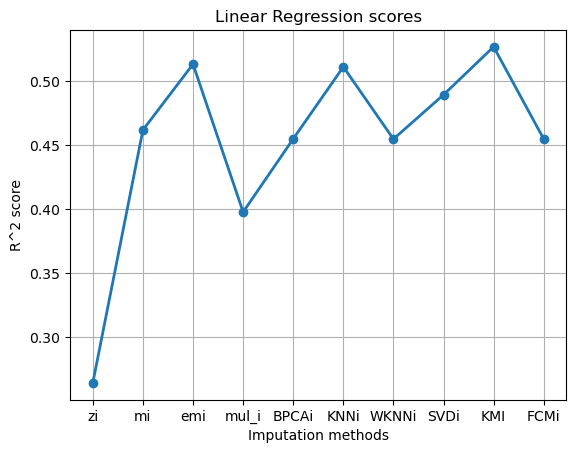

In [64]:
values = []
keys_with_ols = [key for key in scores_mcar.keys() if '_ols' in key]
for key in keys_with_ols:
    values.append(scores_mcar.get(key))
values.append(scores_mcar['mcar_fcmi_ols'])
x=["zi","mi","emi","mul_i","BPCAi","KNNi","WKNNi","SVDi","KMI","FCMi"]
plt.plot(x,values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Imputation methods')
plt.ylabel('R^2 score')
plt.title('Linear Regression scores')
plt.grid(True)
plt.show()

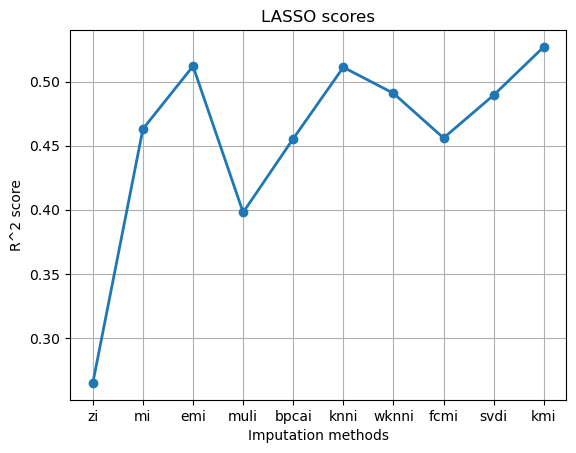

In [75]:
x=['zi','mi','emi','muli','bpcai','knni','wknni','fcmi','svdi','kmi']
values = []
keys_with_ols = [key for key in scores_mcar.keys() if 'lasso' in key]
for key in keys_with_ols:
    values.append(scores_mcar.get(key))
plt.plot(x,values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Imputation methods')
plt.ylabel('R^2 score')
plt.title('LASSO scores')
plt.grid(True)
plt.show()

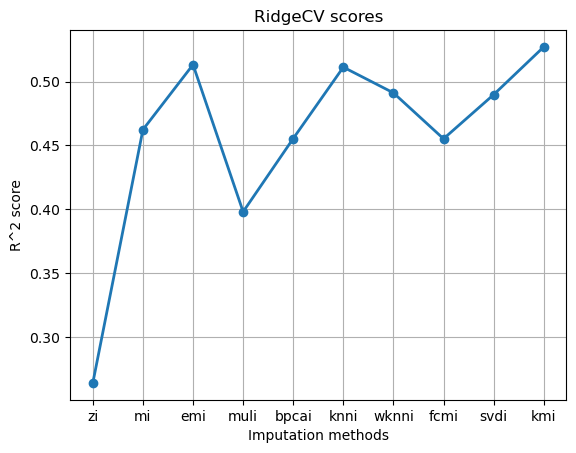

In [73]:
x=['zi','mi','emi','muli','bpcai','knni','wknni','fcmi','svdi','kmi']
values = []
keys_with_ols = [key for key in scores_mcar.keys() if 'ridgecv' in key]
for key in keys_with_ols:
    values.append(scores_mcar.get(key))
plt.plot(x,values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Imputation methods')
plt.ylabel('R^2 score')
plt.title('RidgeCV scores')
plt.grid(True)
plt.show()

In [74]:
keys_with_ols

['mcar_zeroi_ridgecv',
 'mcar_meani_ridgecv',
 'mcar_emi_ridgecv',
 'mcar_mi_ridgecv',
 'mcar_bpcai_ridgecv',
 'mcar_knni_ridgecv',
 'mcar_wknni_ridgecv',
 'mcar_fcmi_ridgecv',
 'mcar_svdi_ridgecv',
 'mcar_kmi_ridgecv']

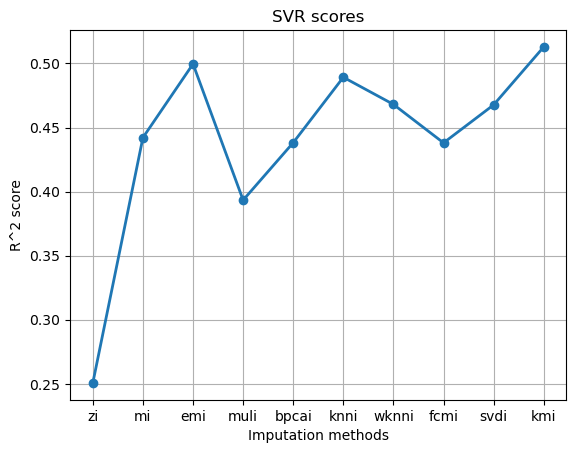

In [71]:
x=['zi','mi','emi','muli','bpcai','knni','wknni','fcmi','svdi','kmi']
values = []
keys_with_ols = [key for key in scores_mcar.keys() if 'i_svr' in key]
for key in keys_with_ols:
    values.append(scores_mcar.get(key))
plt.plot(x,values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Imputation methods')
plt.ylabel('R^2 score')
plt.title('SVR scores')
plt.grid(True)
plt.show()

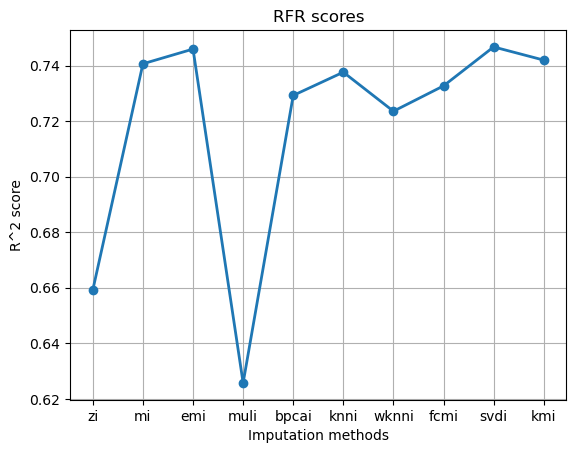

In [70]:
x=['zi','mi','emi','muli','bpcai','knni','wknni','fcmi','svdi','kmi']
values = []
keys_with_ols = [key for key in scores_mcar.keys() if 'rfr' in key]
for key in keys_with_ols:
    values.append(scores_mcar.get(key))
plt.plot(x,values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Imputation methods')
plt.ylabel('R^2 score')
plt.title('RFR scores')
plt.grid(True)
plt.show()

In [76]:
scores_mcar['mcar_svdi_rfr']

0.7467191689482477

## 4. Zaključak:

I kod MAR i kod MCAR najbolji rezultat je dao Random forest regressor model.

Najbolje rezultate, za slučaj kada su podaci MAR su uglavnom davali EM, KNN, WKNN i K-Means imputacioni algoritmi, dok su najgore davali Zero imputation i Mean imputation što je i logično kod MAR podataka.

Za slucaj kada su podaci MCAR (pri čemu su nedostajuće vrednosti prisutne u svim feature-ima), kod linearnih modela se kao najbolji metod pokazao Expectation-Maximization imputacija, dok kog nelinearnih je to SVD imputacija. Kod linearnih modela je najgori metod Zero imputation i Multiple imputation.